## Project: Imtiaz Store Analysis Of Electronics Section Data.

#### Module 1: Data Acquisition and Preprocessing:

##### 1. Data Acquision:

In [1]:
import numpy as np
import pandas as pd

electronics_data = pd.read_json('electronics.json')
electronics_data

Customer_ID Age  Gender Income_Level  \
0    b81ee6c9-2ae4-48a7-b283-220eaa244f43  40  Female       Medium   
1                                          25    Male         High   
2    fdf79bcd-5908-4c90-8501-570ffb5b7648  57   Other          Low   
3    878dccba-893a-48f9-8d34-6ed394fa3c9c  38  Female       Medium   
4    0af0bd81-73cc-494e-aa5e-75c6d0b6d743  68   Other       Medium   
..                                    ...  ..     ...          ...   
995                                        70    Male       Medium   
996  2116266d-8d1c-48cc-ac28-e4e675cb2a4d  78  Female          Low   
997  562cee08-f909-4e1c-a811-5711f967bea5  63    Male         High   
998  84da2eea-6e9e-46d4-8d94-1e9b0c377d78  43    Male         High   
999  87629baf-a138-4374-be37-8bab776379b8  19   Other         High   

                                               Address  \
0    43548 Murray Islands Suite 974\nAmyberg, CT 13457   
1                                                        
2       79683 Kevin Hill Apt. 555\nJohnshire, AR 39961   
3    02998 Hall Meadows Suite 809\nNorth Robertvill...   
4    21411 Timothy Ford Apt. 320\nDavisborough, AR ...   
..                                                 ...   
995          566 Butler Turnpike\nPort Holly, OK 22329   
996  45710 Wilson Circles Apt. 411\nWalterton, NC 8...   
997         243 Emily Creek\nSouth Lindaport, CO 81594   
998    1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587   
999                 896 Troy Branch\nAmytown, NJ 62321   

                           Transaction_ID Purchase_Date  \
0    c6a6c712-e36b-406a-bfde-f53bdcf4744f    2022-04-26   
1    0b587838-1e4f-4231-b488-42bcd47c052a    2021-08-10   
2    462925b1-a5bf-4996-bda2-59749de64eea    2021-12-09   
3    3cfafa02-6b34-4d77-9e05-d223dfab64e8    2022-12-03   
4    0d8dc27a-0c8f-4a82-b57e-8bf54cee9759    2020-06-08   
..                                    ...           ...   
995  776be313-5308-468e-a0ed-7409a4303364    2023-03-17   
996  51f771bf-2562-46c1-a25d-2f46f4bb1525    2023-08-30   
997  74eba598-ee91-4396-a137-6b869702ef29        Hidden   
998  4d2e213e-bcc0-4a8a-9501-6ca8361381c4    2021-05-13   
999  69afa592-2658-48ac-9b37-33a3a473d0be    2022-09-13   

                               Product_ID Product_Category    Brand  \
0    d2f767d6-b01a-41a2-87f7-ec1d1186f50e         Clothing  Brand_C   
1    79eadc55-2de1-41cf-b1b6-40118c0bf8ec            Books  Brand_A   
2    9ab75a68-4329-4bd9-a259-2233c0f34c93      Electronics  Brand_A   
3    d518569b-ff79-494b-b2b6-7e2af39db86a         Clothing  Brand_C   
4    b6deac9d-2b7e-4a51-8273-a6534910b3bc            Books  Brand_B   
..                                    ...              ...      ...   
995  1802f115-80d8-48fd-ad97-94038fe31b82      Electronics  Brand_C   
996  546d8d8f-1498-4aa9-8123-29550d911a17            Books  Brand_B   
997  8b6ffec8-de54-445c-90d0-1399858b2e16           Hidden  Brand_C   
998  51ed2d86-c9ab-4922-a8ff-469acf6ac91e         Clothing  Brand_C   
999  91ba2109-15aa-40a0-aa9c-732a1e2e1e27         Clothing  Brand_B   

    Purchase_Amount Average_Spending_Per_Purchase  \
0               193                            59   
1               318                            77   
2               197                           100   
3               262                            97   
4               429                            85   
..              ...                           ...   
995             180                            92   
996             176                            53   
997             212                            99   
998          Hidden                            98   
999             208                            12   

    Purchase_Frequency_Per_Month Brand_Affinity_Score  \
0                              2                    2   
1                              2                    1   
2                              9                    1   
3                              3                    4   
4       

###### 2. Data Cleaning:

In [2]:
# The `isnull` function is designed to specifically check for null values.
# Since there are no null values in the table, using `isna` also returns no empty cells.
# To identify missing values represented as empty cells, we can use a direct comparison.
# we use `electronics_data == ""`, it will reveal cells with empty values.

direct_check = electronics_data == ''
count = direct_check.sum()

#know, i convert this: "" with isna
electronics_data.replace('', np.nan, inplace=True)
check_isna = electronics_data.isna()
count = check_isna.sum()
print("\t\tMissing Values in each column: \n")
missing_values = []
for name, i in count.items():
    missing_values.append({'Column Names':name, 'Missing Values Count':i})
missing_values_df = pd.DataFrame(missing_values)
print(missing_values_df)

		Missing Values in each column: 

                     Column Names  Missing Values Count
0                     Customer_ID                    32
1                             Age                    33
2                          Gender                    33
3                    Income_Level                    41
4                         Address                    32
5                  Transaction_ID                    39
6                   Purchase_Date                    35
7                      Product_ID                    40
8                Product_Category                    44
9                           Brand                    46
10                Purchase_Amount                    33
11  Average_Spending_Per_Purchase                    26
12   Purchase_Frequency_Per_Month                    37
13           Brand_Affinity_Score                    47
14   Product_Category_Preferences                    31
15                          Month                    40
16           

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode

#know, i handle customer_ID missing value with the keyword 'no-ID'
electronics_data['Customer_ID'].fillna('no-ID',inplace=True)

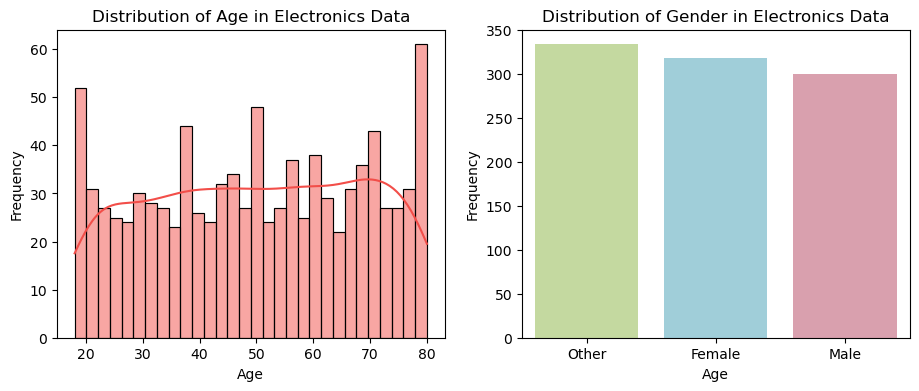

In [4]:
electronics_data = electronics_data.copy()

plt.figure(figsize=(11, 4))

#As you see age values are skewed so, i use histplot
plt.subplot(1, 2, 1)
electronics_data['Age'] = pd.to_numeric(electronics_data['Age'], errors='coerce')
sns.histplot(electronics_data['Age'],kde=True, color='#F24e49', bins=30)
plt.title('Distribution of Age in Electronics Data')
plt.xlabel('Age')
plt.ylabel('Frequency')
#or, i handle Age missing value with median because, age values are skewed or have outliers
electronics_data['Age'] = pd.to_numeric(electronics_data['Age'], errors='coerce')
electronics_data['Age'].fillna(np.median,inplace=True)

#i use bar chart because, gender have discrete categories like male, female, hidden and other.
plt.subplot(1, 2, 2)

#i filter out the rows contain the string 'Hidden' in gender
electronics_data = electronics_data[electronics_data['Gender'] != 'Hidden']

gender_count = electronics_data['Gender'].value_counts()
colors= ['#C6e296', '#96d4e2', '#E296a9']
sns.barplot(x = gender_count.index, y = gender_count.values, palette=colors)
plt.title('Distribution of Gender in Electronics Data')
plt.xlabel('Age')
plt.ylabel('Frequency')
#or, i handle gender missing value with 'Other' because max count or mode in gender is 'others'
mode_value = electronics_data['Gender'].mode()[0]
electronics_data['Gender'].fillna(mode_value, inplace=True)
plt.show()

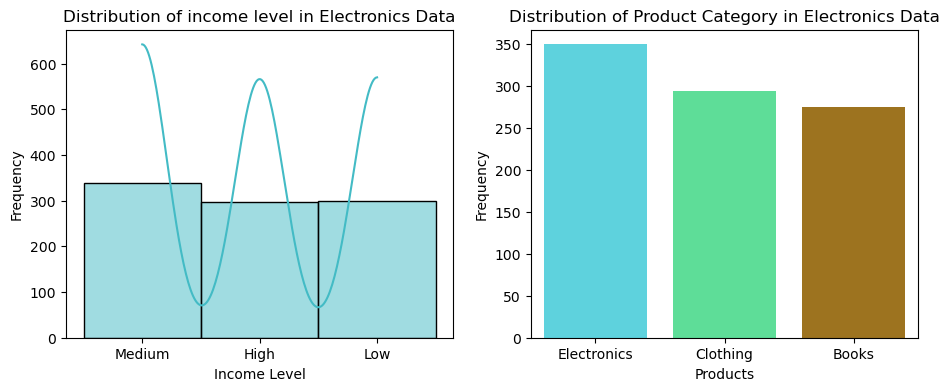

In [5]:
plt.figure(figsize=(11, 4))

#As you see income vales values are in string and have categories so, i use histplot
plt.subplot(1, 2, 1)

#i filter out the rows contain the string 'Hidden' in 'Income_Level'
electronics_data = electronics_data[electronics_data['Income_Level'] != 'Hidden']

sns.histplot(electronics_data['Income_Level'],kde=True, color='#43bbc5', bins=30)
plt.title('Distribution of income level in Electronics Data')
plt.xlabel('Income Level')
plt.ylabel('Frequency')
#or, i handle income level missing value with mode of income level which is Medium shown in chart
mode_value_2 = electronics_data['Income_Level'].mode()[0]
electronics_data['Income_Level'].fillna(mode_value_2,inplace=True)

#or, i handle Address missing value with the keyword 'no-Address'
electronics_data['Address'].fillna('no-Address',inplace=True)

#or, i handle Transaction_ID missing value with the keyword 'no-ID'
electronics_data['Transaction_ID'].fillna('no-ID',inplace=True)

#or, i handle Purchase_Date missing value with ffill because, it remains the same as the previous valid date
electronics_data['Purchase_Date'].ffill(inplace=True)

#or, i handle Product_ID missing value with the keyword 'no-ID'
electronics_data['Product_ID'].fillna('no-ID',inplace=True)

#i use bar chart because, product category have discrete categories like electronics, clothings etc.
plt.subplot(1, 2, 2)

#i filter out the rows contain the string 'Hidden' in 'Product_Category'
electronics_data = electronics_data[electronics_data['Product_Category'] != 'Hidden']

gender_count = electronics_data['Product_Category'].value_counts()
colors= ['#49e4f2', '#49f296', '#B27a0a', '#453006']
sns.barplot(x = gender_count.index, y = gender_count.values, palette=colors)
plt.title('Distribution of Product Category in Electronics Data')
plt.xlabel('Products')
plt.ylabel('Frequency')
#or, i handle Product_Category missing value with 'Electronics' because max count or mode in Product_Category is 'Electronics'
mode_value_3 = electronics_data['Product_Category'].mode()[0]
electronics_data['Product_Category'].fillna(mode_value_3,inplace=True)

plt.show()

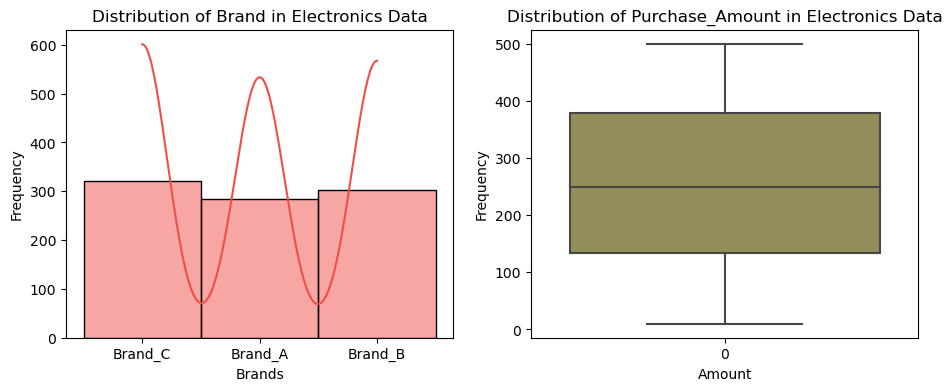

In [6]:
plt.figure(figsize=(11, 4))

#As you see Brand values are in string and have categories so, i use histplot
plt.subplot(1, 2, 1)

#i filter out the rows contain the string 'Hidden' in 'Brand'
electronics_data = electronics_data[electronics_data['Brand'] != 'Hidden']

sns.histplot(electronics_data['Brand'],kde=True, color='#F24e49', bins=30)
plt.title('Distribution of Brand in Electronics Data')
plt.xlabel('Brands')
plt.ylabel('Frequency')
#or, i handle Brand missing value with mode of Brand which is brand_c shown in chart
mode_value_4 = electronics_data['Brand'].mode()[0]
electronics_data['Brand'].fillna(mode_value_4,inplace=True)

#I use box plot because it provide a clear summary of the distribution of data, including the mean
plt.subplot(1, 2, 2)
electronics_data['Purchase_Amount'] = pd.to_numeric(electronics_data['Purchase_Amount'], errors='coerce')
sns.boxplot(electronics_data['Purchase_Amount'], color='#9c9550')
plt.title('Distribution of Purchase_Amount in Electronics Data')
plt.xlabel('Amount')
plt.ylabel('Frequency')
#or, i handle Purchase_Amount missing value with mean of Purchase_Amount which is shown in chart
mean_value = electronics_data['Purchase_Amount'].mean()
electronics_data['Purchase_Amount'].fillna(mean_value,inplace=True)

plt.show()

5.489977728285078


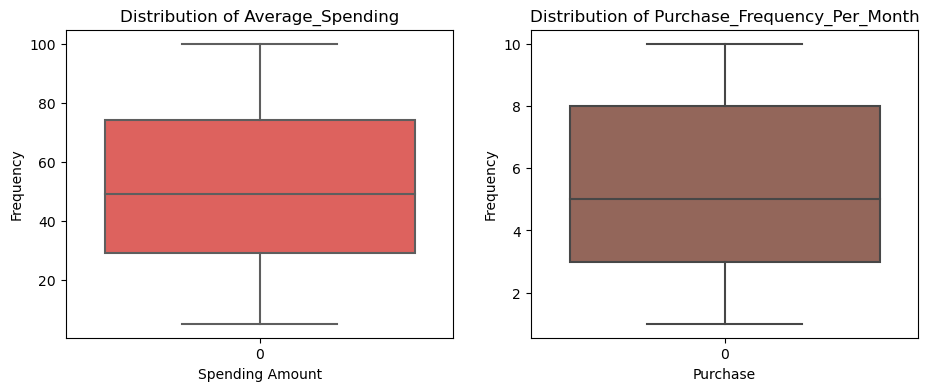

In [7]:
plt.figure(figsize=(11, 4))

#I use box plot because it provide a clear summary of the distribution of data, including the mean
plt.subplot(1, 2, 1)
electronics_data['Average_Spending_Per_Purchase'] = pd.to_numeric(electronics_data['Average_Spending_Per_Purchase'], errors='coerce')
sns.boxplot(electronics_data['Average_Spending_Per_Purchase'], color='#F24e49')
plt.title('Distribution of Average_Spending')
plt.xlabel('Spending Amount')
plt.ylabel('Frequency')
#or, i handle Average_Spending_Per_Purchase missing value with mean of Average_Spending_Per_Purchase which is shown in chart
mean_value_1 = electronics_data['Average_Spending_Per_Purchase'].mean()
electronics_data['Average_Spending_Per_Purchase'].fillna(mean_value_1,inplace=True)

#I use box plot because it provide a clear summary of the distribution of data, including the mean
plt.subplot(1, 2, 2)
electronics_data['Purchase_Frequency_Per_Month'] = pd.to_numeric(electronics_data['Purchase_Frequency_Per_Month'], errors='coerce')
sns.boxplot(electronics_data['Purchase_Frequency_Per_Month'], color='#9c6050')
plt.title('Distribution of Purchase_Frequency_Per_Month')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
#or, i handle Purchase_Frequency_Per_Month missing value with mean of Purchase_Frequency_Per_Month which is shown in chart
mean_value_2 = electronics_data['Purchase_Frequency_Per_Month'].mean()
print(mean_value_2)
electronics_data['Purchase_Frequency_Per_Month'].fillna(mean_value_2,inplace=True)

plt.show()

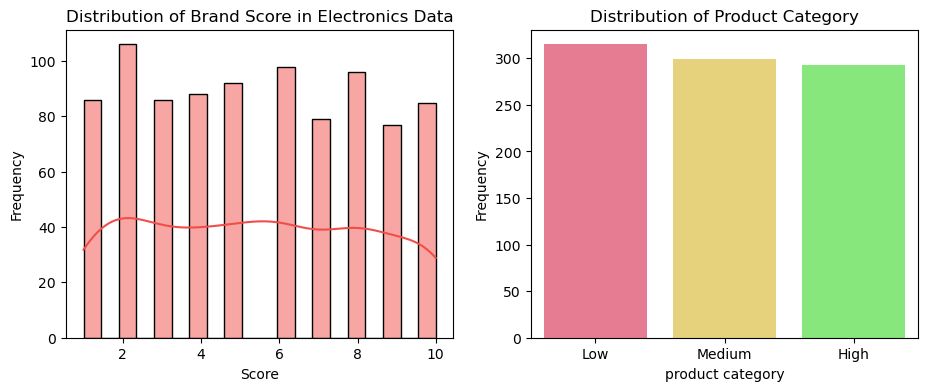

In [8]:
plt.figure(figsize=(11, 4))

#As you see age values are skewed so, i use histplot
plt.subplot(1, 2, 1)
electronics_data['Brand_Affinity_Score'] = pd.to_numeric(electronics_data['Brand_Affinity_Score'], errors='coerce')
sns.histplot(electronics_data['Brand_Affinity_Score'],kde=True, color='#F24e49', bins=20)
plt.title('Distribution of Brand Score in Electronics Data')
plt.xlabel('Score')
plt.ylabel('Frequency')
#or, i handle Brand_Affinity_Score missing value with median because, Brand_Affinity_Score values are skewed or have outliers
mode_value_5 = electronics_data['Brand_Affinity_Score'].mode()[0]
electronics_data['Brand_Affinity_Score'].fillna(mode_value_5,inplace=True)

#i use bar chart because, Product_Category_Preferences have discrete categories like others. low etc.
plt.subplot(1, 2, 2)

#i filter out the rows contain the string 'Hidden' in 'Product_Category_Preferences'
electronics_data = electronics_data[electronics_data['Product_Category_Preferences'] != 'Hidden']

gender_count = electronics_data['Product_Category_Preferences'].value_counts()
colors= ['#F86a88', '#F8dc6a', '#79f86a', '#6a74f8']
sns.barplot(x = gender_count.index, y = gender_count.values, palette=colors)
plt.title('Distribution of Product Category')
plt.xlabel('product category')
plt.ylabel('Frequency')
#or, i handle gender missing value with 'Other' because max count or mode in gender is 'others'
mode_value_6 = electronics_data['Product_Category_Preferences'].mode()[0]
electronics_data['Product_Category_Preferences'].fillna(mode_value_6,inplace=True)

plt.show()


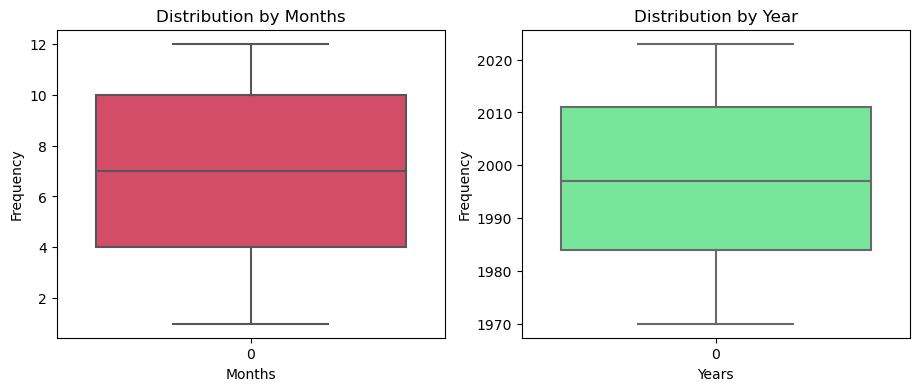

In [9]:
plt.figure(figsize=(11, 4))

#I use box plot because it provide a clear summary of the distribution of data, including the median
plt.subplot(1, 2, 1)
electronics_data['Month'] = pd.to_numeric(electronics_data['Month'], errors='coerce')
sns.boxplot(electronics_data['Month'], color='#Ea365c')
plt.title('Distribution by Months')
plt.xlabel('Months')
plt.ylabel('Frequency')
#or, i handle Month missing value with median of Month which is shown in chart
median_1 = electronics_data['Month'].median()
electronics_data['Month'].fillna(median_1,inplace=True)

#I use box plot because it provide a clear summary of the distribution of data, including the median
plt.subplot(1, 2, 2)
electronics_data['Year'] = pd.to_numeric(electronics_data['Year'], errors='coerce')
sns.boxplot(electronics_data['Year'], color='#65f893')
plt.title('Distribution by Year')
plt.xlabel('Years')
plt.ylabel('Frequency')
#or, i handle Year missing value with median of Year which is shown in chart
median_2 = electronics_data['Year'].median()
electronics_data['Year'].fillna(median_2,inplace=True)

plt.show()


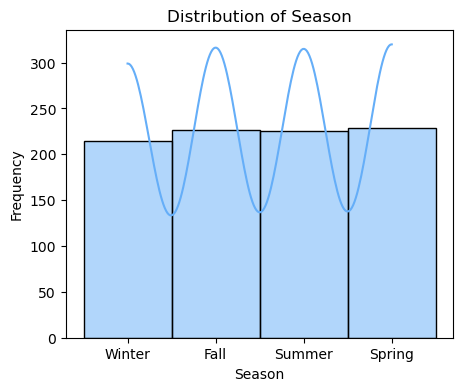

In [10]:
plt.figure(figsize=(11, 4))

#i use bar chart because, Season have discrete categories like fall etc.
plt.subplot(1, 2, 1)

#i filter out the rows contain the string 'Hidden' in 'Season'
electronics_data = electronics_data[electronics_data['Season'] != 'Hidden']

gender_count = electronics_data['Season'].value_counts()
sns.histplot(electronics_data['Season'],kde=True, color='#65aef8', bins=30)
plt.title('Distribution of Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
#or, i handle Season missing value with 'FALL' because max count or mode in Season is 'FALL'
mode_value_7 = electronics_data['Season'].mode()[0]
electronics_data['Season'].fillna(mode_value_7,inplace=True)

plt.show()

In [11]:
check_isna = electronics_data.isna()
count = check_isna.sum()
print("\t\t\t  RECHECK")
print("\t\tMissing Values in each column: \n")
missing_values = []
for name, i in count.items():
    missing_values.append({'Column Names':name, 'Missing Values Count':i})
missing_values_df = pd.DataFrame(missing_values)
print(missing_values_df)

			  RECHECK
		Missing Values in each column: 

                     Column Names  Missing Values Count
0                     Customer_ID                     0
1                             Age                     0
2                          Gender                     0
3                    Income_Level                     0
4                         Address                     0
5                  Transaction_ID                     0
6                   Purchase_Date                     0
7                      Product_ID                     0
8                Product_Category                     0
9                           Brand                     0
10                Purchase_Amount                     0
11  Average_Spending_Per_Purchase                     0
12   Purchase_Frequency_Per_Month                     0
13           Brand_Affinity_Score                     0
14   Product_Category_Preferences                     0
15                          Month                     0


In [12]:
#i filter out the rows contain the string 'Hidden' in purchase date
electronics_data = electronics_data[electronics_data['Purchase_Date'] != 'Hidden']

#i also change the format of purshase date to datetime
electronics_data = electronics_data.copy()
electronics_data['Purchase_Date'] = pd.to_datetime(electronics_data['Purchase_Date'])

###### 3. Data Transformation:

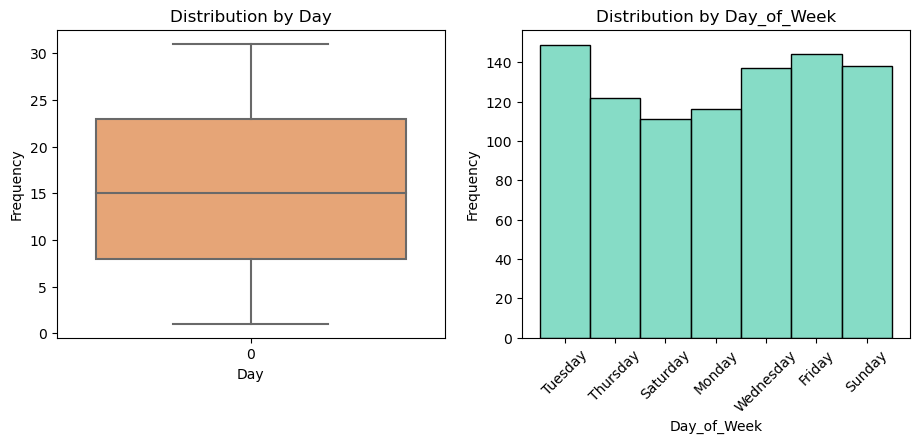

In [13]:
plt.figure(figsize=(11, 4))
# I create a new column of day which is extract from purchase_date because, i can analyze data based on the day of the month
plt.subplot(1, 2, 1)
electronics_data['Day'] = electronics_data['Purchase_Date'].dt.day
electronics_data['Day'] = pd.to_numeric(electronics_data['Day'], errors='coerce')
sns.boxplot(electronics_data['Day'], color='#F8a265')
plt.title('Distribution by Day')
plt.xlabel('Day')
plt.ylabel('Frequency')
#or, i handle Day missing value with median of Day which is shown in chart
median_3 = electronics_data['Day'].median()
electronics_data['Day'].fillna(median_3,inplace=True)

#or, i create a new column 'day_of_week' because it help us to analyize data by day of the week
plt.subplot(1, 2, 2)
electronics_data['Purchase_Date'] = pd.to_datetime(electronics_data['Purchase_Date'])
electronics_data['Day_of_Week'] = electronics_data['Purchase_Date'].dt.day_name()
sns.histplot(electronics_data['Day_of_Week'], color='#5ed1b3')
plt.title('Distribution by Day_of_Week')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
#or, i handle Day missing value with mode of Day which is shown in chart
mode_value_8 = electronics_data['Day_of_Week'].mode()[0]
electronics_data['Day_of_Week'].fillna(mode_value_8,inplace=True)
plt.show()

#or, i create a new column 'Product_Category_Preference_Score' with product_category_preferences to map it.
preference_mapping = {'High': 3, 'Medium': 2, 'Low': 1}
electronics_data['Product_Category_Preference_Score'] = electronics_data['Product_Category_Preferences'].map(preference_mapping)
#or, i handle 'Product_Category_Preference_Score' with mode of it
electronics_data['Product_Category_Preference_Score'] = pd.to_numeric(electronics_data['Product_Category_Preference_Score'], errors='coerce')
mode_value_9 = electronics_data['Product_Category_Preference_Score'].mode()[0]
electronics_data['Product_Category_Preference_Score'].fillna(mode_value_9, inplace=True)

#or, i create a new column 'Income_Level_Score' with income_level to map it.
income_mapping = {'High': 3, 'Medium': 2, 'Low': 1}
electronics_data['Income_Level_Score'] = electronics_data['Income_Level'].map(income_mapping)
#or, i handle 'Income_Level_Score' with mode of it
electronics_data['Income_Level_Score'] = pd.to_numeric(electronics_data['Income_Level_Score'], errors='coerce')
mode_value_10 = electronics_data['Income_Level_Score'].mode()[0]
electronics_data['Income_Level_Score'].fillna(mode_value_10, inplace=True)

#i also convert any other type instead of numeric to median of age
electronics_data['Age'] = pd.to_numeric(electronics_data['Age'], errors='coerce')
median_4 = electronics_data['Age'].median()
electronics_data['Age'].fillna(median_4, inplace=True)


In [14]:
#Standardize or normalize numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(electronics_data[['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Product_Category_Preference_Score', 'Income_Level_Score']])
scaled_features

array([[-0.54254275, -0.42682375,  0.2886596 , ..., -1.10503437,
        -1.14378199, -0.00554253],
       [-1.37720057,  0.47697101,  0.97049337, ..., -1.45064027,
        -1.14378199,  1.26508181],
       [ 0.40340277, -0.39790232,  1.8417254 , ..., -1.45064027,
        -1.14378199, -1.27616687],
       ...,
       [ 1.57192372, -0.54973984,  0.06138168, ..., -0.75942846,
         0.07156921, -1.27616687],
       [-0.37561119, -0.0022118 ,  1.76596609, ...,  0.62299516,
        -1.14378199,  1.26508181],
       [-1.71106369, -0.31836838, -1.49168411, ..., -1.45064027,
         0.07156921,  1.26508181]])

In [15]:
electronics_data

Customer_ID   Age  Gender Income_Level  \
0    b81ee6c9-2ae4-48a7-b283-220eaa244f43  40.0  Female       Medium   
1                                   no-ID  25.0    Male         High   
2    fdf79bcd-5908-4c90-8501-570ffb5b7648  57.0   Other          Low   
3    878dccba-893a-48f9-8d34-6ed394fa3c9c  38.0  Female       Medium   
4    0af0bd81-73cc-494e-aa5e-75c6d0b6d743  68.0   Other       Medium   
..                                    ...   ...     ...          ...   
994  b17a7ab6-f7c6-4f76-81e4-2b7536730065  65.0  Female         High   
995                                 no-ID  70.0    Male       Medium   
996  2116266d-8d1c-48cc-ac28-e4e675cb2a4d  78.0  Female          Low   
998  84da2eea-6e9e-46d4-8d94-1e9b0c377d78  43.0    Male         High   
999  87629baf-a138-4374-be37-8bab776379b8  19.0   Other         High   

                                               Address  \
0    43548 Murray Islands Suite 974\nAmyberg, CT 13457   
1                                           no-Address   
2       79683 Kevin Hill Apt. 555\nJohnshire, AR 39961   
3    02998 Hall Meadows Suite 809\nNorth Robertvill...   
4    21411 Timothy Ford Apt. 320\nDavisborough, AR ...   
..                                                 ...   
994    0676 Gonzalez Pike Apt. 421\nAmymouth, ND 66046   
995          566 Butler Turnpike\nPort Holly, OK 22329   
996  45710 Wilson Circles Apt. 411\nWalterton, NC 8...   
998    1129 Kirby Ferry Suite 743\nBillyfurt, UT 41587   
999                 896 Troy Branch\nAmytown, NJ 62321   

                           Transaction_ID Purchase_Date  \
0    c6a6c712-e36b-406a-bfde-f53bdcf4744f    2022-04-26   
1    0b587838-1e4f-4231-b488-42bcd47c052a    2021-08-10   
2    462925b1-a5bf-4996-bda2-59749de64eea    2021-12-09   
3    3cfafa02-6b34-4d77-9e05-d223dfab64e8    2022-12-03   
4    0d8dc27a-0c8f-4a82-b57e-8bf54cee9759    2020-06-08   
..                                    ...           ...   
994  0f8a3f06-1234-4774-8b2f-14d159567ea1    2022-02-11   
995  776be313-5308-468e-a0ed-7409a4303364    2023-03-17   
996  51f771bf-2562-46c1-a25d-2f46f4bb1525    2023-08-30   
998  4d2e213e-bcc0-4a8a-9501-6ca8361381c4    2021-05-13   
999  69afa592-2658-48ac-9b37-33a3a473d0be    2022-09-13   

                               Product_ID Product_Category    Brand  ...  \
0    d2f767d6-b01a-41a2-87f7-ec1d1186f50e         Clothing  Brand_C  ...   
1    79eadc55-2de1-41cf-b1b6-40118c0bf8ec            Books  Brand_A  ...   
2    9ab75a68-4329-4bd9-a259-2233c0f34c93      Electronics  Brand_A  ...   
3    d518569b-ff79-494b-b2b6-7e2af39db86a         Clothing  Brand_C  ...   
4    b6deac9d-2b7e-4a51-8273-a6534910b3bc            Books  Brand_B  ...   
..                                    ...              ...      ...  ...   
994  23a4c4aa-a0bb-44ae-a5fd-817420f96b91         Clothing  Brand_B  ...   
995  1802f115-80d8-48fd-ad97-94038fe31b82      Electronics  Brand_C  ...   
996  546d8d8f-1498-4aa9-8123-29550d911a17            Books  Brand_B  ...   
998  51ed2d86-c9ab-4922-a8ff-469acf6ac91e         Clothing  Brand_C  ...   
999  91ba2109-15aa-40a0-aa9c-732a1e2e1e27         Clothing  Brand_B  ...   

     Purchase_Frequency_Per_Month  Brand_Affinity_Score  \
0                             2.0                   2.0   
1                             2.0                   1.0   
2                             9.0                   1.0   
3                             3.0                   4.0   
4                             7.0                   2.0   
..                            ...                   ...   
994                           7.0                   4.0   
995                           2.0                   5.0   
996                           3.0                   3.0   
998                           8.0                   7.0   
999                          10.0                   1.0   

     Product_Category_Preferences  Month    Year  Season  Day Day_of_Week  \
0                             Low    1.0  2010.0  Winter   2

#### Module 2: Exploratory Data Analysis(EDA):

##### 1. Univariate Analysis:

					 Distribution Of Key Features: 


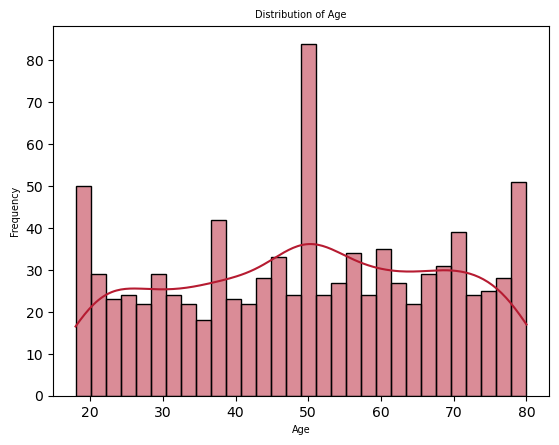

In [16]:
# 1. Distribution Of Key Features
print("\t\t\t\t\t Distribution Of Key Features: ")

#As you see age values are skewed so, i use histplot
electronics_data['Age'] = pd.to_numeric(electronics_data['Age'], errors='coerce')
sns.histplot(electronics_data['Age'],kde=True, color='#B61b31', bins=30)
plt.title('Distribution of Age', fontsize=7)
plt.xlabel('Age', fontsize=7)
plt.ylabel('Frequency', fontsize=7)
plt.show()

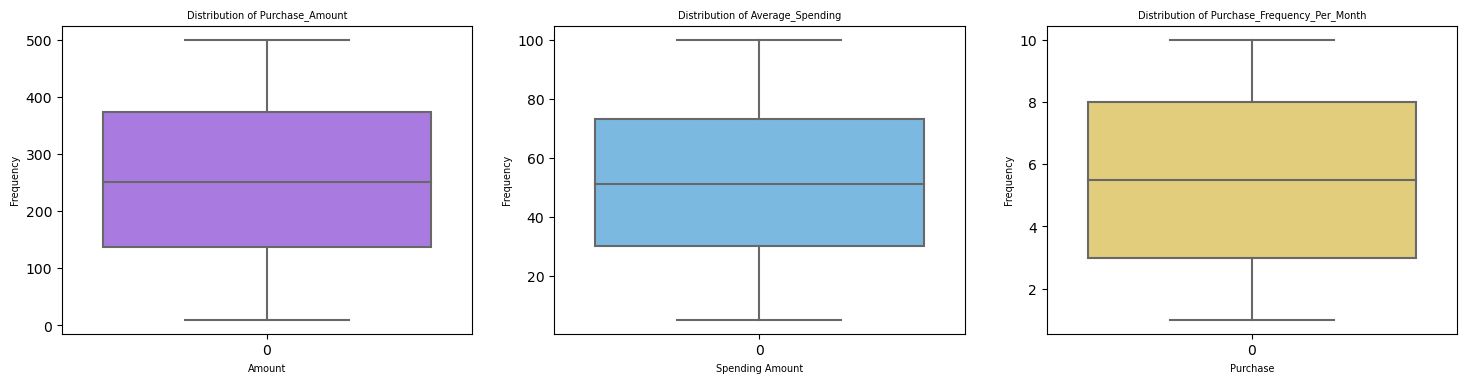

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), gridspec_kw={'width_ratios': [1, 1, 1]})

#i use bar chart because, gender have discrete categories like male, female, hidden and other.
electronics_data['Purchase_Amount'] = pd.to_numeric(electronics_data['Purchase_Amount'], errors='coerce')
sns.boxplot(electronics_data['Purchase_Amount'], color='#A86af2', ax=axs[0])
axs[0].set_title('Distribution of Purchase_Amount', fontsize=7)
axs[0].set_xlabel('Amount', fontsize=7)
axs[0].set_ylabel('Frequency', fontsize=7)

#I use box plot because it provide a clear summary of the distribution of data, including the mean
electronics_data['Average_Spending_Per_Purchase'] = pd.to_numeric(electronics_data['Average_Spending_Per_Purchase'], errors='coerce')
sns.boxplot(electronics_data['Average_Spending_Per_Purchase'], color='#6abcf2', ax=axs[1])
axs[1].set_title('Distribution of Average_Spending', fontsize=7)
axs[1].set_xlabel('Spending Amount', fontsize=7)
axs[1].set_ylabel('Frequency', fontsize=7)

electronics_data['Purchase_Frequency_Per_Month'] = pd.to_numeric(electronics_data['Purchase_Frequency_Per_Month'], errors='coerce')
sns.boxplot(electronics_data['Purchase_Frequency_Per_Month'], color='#F2d76a', ax=axs[2])
axs[2].set_title('Distribution of Purchase_Frequency_Per_Month', fontsize=7)
axs[2].set_xlabel('Purchase', fontsize=7)
axs[2].set_ylabel('Frequency', fontsize=7)

plt.show()

In [18]:
# 2. potential skewness or outliers in the data.
print("\n\t\t\t\tpotential skewness or outliers in the data: \n")

from tabulate import tabulate

Age_column = electronics_data['Age'].describe()
Purchase_Column = electronics_data['Purchase_Amount'].describe()
Avg_column = electronics_data['Average_Spending_Per_Purchase'].describe()
per_month_column = electronics_data['Purchase_Frequency_Per_Month'].describe()

table_df = pd.DataFrame({
    'Age': Age_column,
    'Purchase_Amount': Purchase_Column,
    'Average_Spending_Per_Purchase': Avg_column,
    'Purchase_Frequency_Per_Month': per_month_column
})

index_names = ['Count', 'Mean', 'Std', 'Min', '25%', '50%', '75%', 'Max']
table_df.index = index_names
table = tabulate(table_df, headers='keys', tablefmt='grid')

print(table)


				potential skewness or outliers in the data: 

+-------+----------+-------------------+---------------------------------+--------------------------------+
|       |      Age |   Purchase_Amount |   Average_Spending_Per_Purchase |   Purchase_Frequency_Per_Month |
+=======+==========+===================+=================================+================================+
| Count | 917      |           917     |                        917      |                      917       |
+-------+----------+-------------------+---------------------------------+--------------------------------+
| Mean  |  49.7503 |           252.032 |                         51.3796 |                        5.50274 |
+-------+----------+-------------------+---------------------------------+--------------------------------+
| Std   |  17.9812 |           138.381 |                         26.4138 |                        2.76381 |
+-------+----------+-------------------+---------------------------------+-----------

##### 2. Bivariate Analysis:

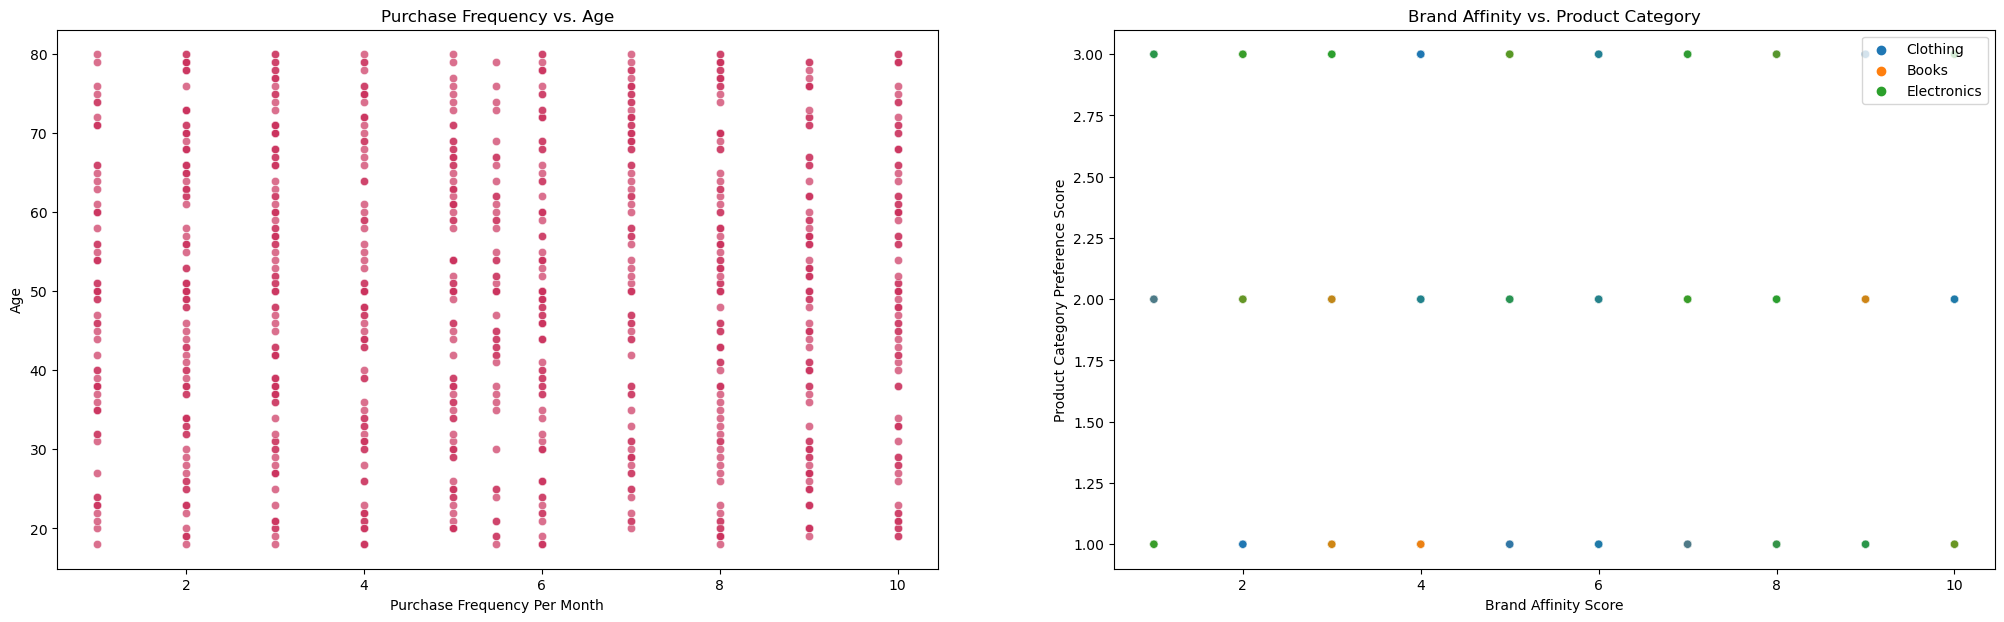

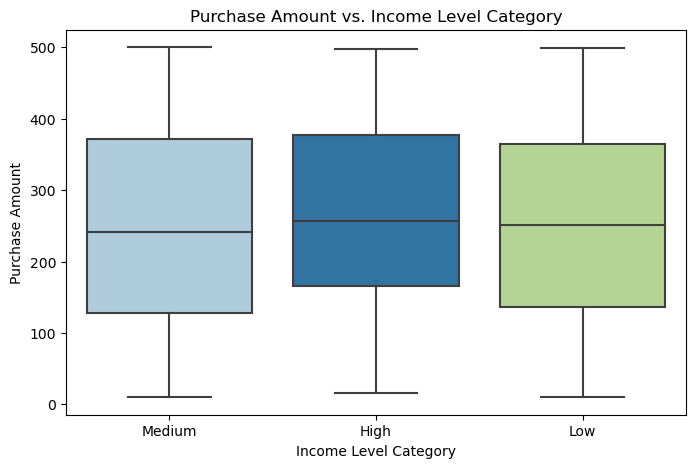

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(25, 7), gridspec_kw={'width_ratios': [1, 1]})
sns.scatterplot(x='Purchase_Frequency_Per_Month', y='Age', data=electronics_data, alpha=0.7,  color= '#Cb335e', ax = axs[0])
axs[0].set_title('Purchase Frequency vs. Age')
axs[0].set_xlabel('Purchase Frequency Per Month')
axs[0].set_ylabel('Age')

sns.scatterplot(x='Brand_Affinity_Score', y='Product_Category_Preference_Score', data=electronics_data, hue='Product_Category', alpha=0.7, ax=axs[1])
axs[1].set_title('Brand Affinity vs. Product Category')
axs[1].set_xlabel('Brand Affinity Score')
axs[1].set_ylabel('Product Category Preference Score')
axs[1].legend(loc='upper right')

plt.figure(figsize=(8, 5))
labels = ['Low', 'Medium', 'High']
sns.boxplot(x='Income_Level', y='Purchase_Amount', data=electronics_data, palette='Paired')
plt.title('Purchase Amount vs. Income Level Category')
plt.xlabel('Income Level Category')
plt.ylabel('Purchase Amount')
plt.show()

In [20]:
correlation_matrix = electronics_data[['Purchase_Amount','Income_Level', 'Brand_Affinity_Score', 'Age']].corr(numeric_only = True)
print("\t\t\tCorrelation Of Electronics Data:")
print(tabulate(correlation_matrix,tablefmt='grid', headers='keys'))

#i use encoding because, encoding is a common technique to represent categorical variables numerically
electronics_data_encoded = pd.get_dummies(electronics_data, columns=['Income_Level'])
print("\n\t\t\t\t\t\t Encoded Electronics Data")
electronics_data_encoded.head(10)

			Correlation Of Electronics Data:
+----------------------+-------------------+------------------------+------------+
|                      |   Purchase_Amount |   Brand_Affinity_Score |        Age |
+======================+===================+========================+============+
| Purchase_Amount      |         1         |              0.0272763 | -0.0109809 |
+----------------------+-------------------+------------------------+------------+
| Brand_Affinity_Score |         0.0272763 |              1         |  0.0182494 |
+----------------------+-------------------+------------------------+------------+
| Age                  |        -0.0109809 |              0.0182494 |  1         |
+----------------------+-------------------+------------------------+------------+

						 Encoded Electronics Data


Customer_ID   Age  Gender  \
0  b81ee6c9-2ae4-48a7-b283-220eaa244f43  40.0  Female   
1                                 no-ID  25.0    Male   
2  fdf79bcd-5908-4c90-8501-570ffb5b7648  57.0   Other   
3  878dccba-893a-48f9-8d34-6ed394fa3c9c  38.0  Female   
4  0af0bd81-73cc-494e-aa5e-75c6d0b6d743  68.0   Other   
5  5a4ac4ce-1e09-4ecb-805c-fb676f101385  26.0   Other   
6  e67f67b2-12f2-4b0c-b027-19cb052b3dd8  50.0  Female   
7  80a5d367-b3dc-4c18-8a93-584e7c5e7e29  23.0  Female   
8                                 no-ID  22.0    Male   
9  a9dc9153-9750-471a-8a90-7c46292fc34c  80.0  Female   

                                             Address  \
0  43548 Murray Islands Suite 974\nAmyberg, CT 13457   
1                                         no-Address   
2     79683 Kevin Hill Apt. 555\nJohnshire, AR 39961   
3  02998 Hall Meadows Suite 809\nNorth Robertvill...   
4  21411 Timothy Ford Apt. 320\nDavisborough, AR ...   
5  843 John Knoll Suite 876\nRodriguezmouth, MO 3...   
6  166 Johnny Mount Suite 366\nKimberlyberg, KS 6...   
7  203 Tiffany Hill Suite 971\nPort Josetown, VI ...   
8  76417 Johnson Flat Suite 425\nCrystalchester, ...   
9                   Unit 3169 Box 6845\nDPO AA 27380   

                         Transaction_ID Purchase_Date  \
0  c6a6c712-e36b-406a-bfde-f53bdcf4744f    2022-04-26   
1  0b587838-1e4f-4231-b488-42bcd47c052a    2021-08-10   
2  462925b1-a5bf-4996-bda2-59749de64eea    2021-12-09   
3  3cfafa02-6b34-4d77-9e05-d223dfab64e8    2022-12-03   
4  0d8dc27a-0c8f-4a82-b57e-8bf54cee9759    2020-06-08   
5  5b0d927b-a342-4df1-8846-a1acc62e2842    2022-12-03   
6  878c7ab1-ec62-4fc5-9061-6bed5db334f6    2021-12-22   
7  e88c395b-2e4e-4d97-bbdb-0cc321168753    2022-09-30   
8  cdae113e-9cb5-4a30-92f9-2c5637044d2a    2023-08-19   
9  24577c38-d74b-41a3-a944-2d32510b842b    2020-07-20   

                             Product_ID Product_Category    Brand  \
0  d2f767d6-b01a-41a2-87f7-ec1d1186f50e         Clothing  Brand_C   
1  79eadc55-2de1-41cf-b1b6-40118c0bf8ec            Books  Brand_A   
2  9ab75a68-4329-4bd9-a259-2233c0f34c93      Electronics  Brand_A   
3  d518569b-ff79-494b-b2b6-7e2af39db86a         Clothing  Brand_C   
4  b6deac9d-2b7e-4a51-8273-a6534910b3bc            Books  Brand_B   
5  03f82332-801c-45e2-84bf-af10a8f60248            Books  Brand_A   
6  8f399675-5c05-4bef-b5d1-863ec387e70a         Clothing  Brand_C   
7  f2f4088c-8822-4532-8b4d-ae4ed9ff2e1c         Clothing  Brand_A   
8  06bd8738-5110-49bd-abeb-1abdb3ce7f6b      Electronics  Brand_C   
9  ee4c9e6c-801d-425d-ae12-589570ab3a66            Books  Brand_A   

   Purchase_Amount  ...  Month    Year  Season Day  Day_of_Week  \
0            193.0  ...    1.0  2010.0  Winter  26      Tuesday   
1            318.0  ...    8.0  1989.0    Fall  10      Tuesday   
2            197.0  ...    7.0  1995.0  Winter   9     Thursday   
3            262.0  ...    9.0  2012.0    Fall   3     Saturday   
4            429.0  ...    1.0  2010.0  Summer   8       Monday   
5             57.0  ...    8.0  1989.0  Spring   3     Saturday   
6            441.0  ...    4.0  1973.0    Fall  22    Wednesday   
7            390.0  ...    4.0  1976.0  Winter  30       Friday   
8            297.0  ...   11.0  2018.0    Fall  19     Saturday   
9             84.0  ...    9.0  1997.0    Fall  20       Monday   

   Product_Category_Preference_Score Income_Level_Score  Income_Level_High  \
0                                  1                  2                  0   
1                                  1                  3                  1   
2                                  1                  1                  0   
3                                  1                  2                  0   
4                                  3                  2                  0   
5                                  3                  3                  1   
6                                  2                  2                  0   
7                                

In [21]:
#i re-check the correlation
correlation_matrix_1 = electronics_data_encoded[['Purchase_Amount', 'Income_Level_Medium', 'Brand_Affinity_Score', 'Age']].corr(numeric_only = True)
print("\t\t\t\t Recheck the Correlation Of Electronics Data:")
print(tabulate(correlation_matrix_1,tablefmt='grid', headers='keys'))

				 Recheck the Correlation Of Electronics Data:
+----------------------+-------------------+-----------------------+------------------------+------------+
|                      |   Purchase_Amount |   Income_Level_Medium |   Brand_Affinity_Score |        Age |
+======================+===================+=======================+========================+============+
| Purchase_Amount      |         1         |           -0.0305239  |             0.0272763  | -0.0109809 |
+----------------------+-------------------+-----------------------+------------------------+------------+
| Income_Level_Medium  |        -0.0305239 |            1          |            -0.00534562 |  0.0171412 |
+----------------------+-------------------+-----------------------+------------------------+------------+
| Brand_Affinity_Score |         0.0272763 |           -0.00534562 |             1          |  0.0182494 |
+----------------------+-------------------+-----------------------+------------------------+-

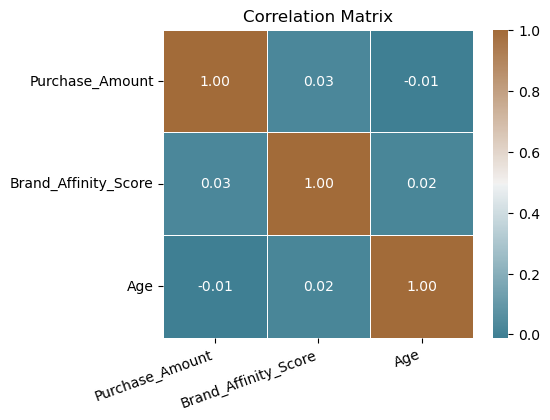

In [22]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.diverging_palette(220, 40, as_cmap=True), fmt=".2f", linewidths=.5, color='white')
plt.title('Correlation Matrix')
plt.xticks(rotation=20, horizontalalignment='right')
plt.show()

##### 3. Temporal Analysis:

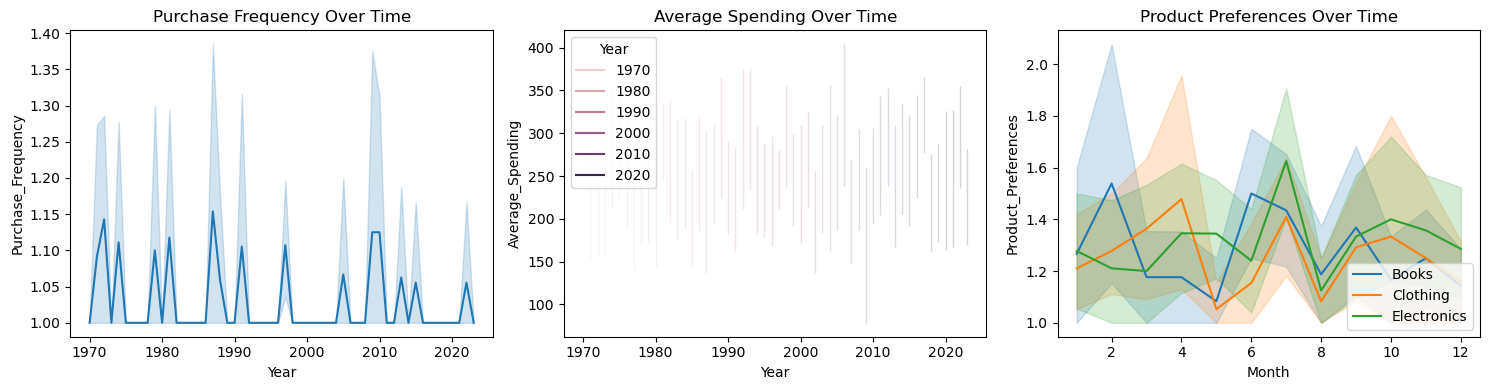

In [23]:
purchase_freq_by_month = electronics_data.groupby(['Year', 'Month','Day']).size().reset_index(name='Purchase_Frequency')
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.lineplot(x='Year', y='Purchase_Frequency', data=purchase_freq_by_month)
plt.title('Purchase Frequency Over Time')

average_spending_by_month = electronics_data.groupby(['Year', 'Month','Day'])['Purchase_Amount'].mean().reset_index(name='Average_Spending')
plt.subplot(1, 3, 2)
sns.lineplot(x='Year', y='Average_Spending', hue='Year', data=average_spending_by_month)
plt.title('Average Spending Over Time')

product_preferences_by_month = electronics_data.groupby(['Year', 'Month', 'Product_Category']).size().reset_index(name='Product_Preferences')
plt.subplot(1, 3, 3)
sns.lineplot(x='Month', y='Product_Preferences', hue='Product_Category', data=product_preferences_by_month)
plt.title('Product Preferences Over Time')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

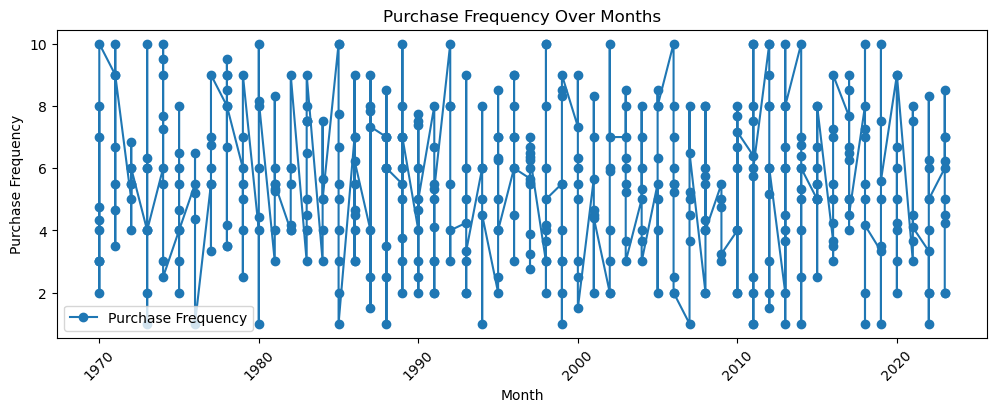

In [24]:
#seasonal variations or any significant shifts in customer behavior
monthly_data = electronics_data.groupby(['Year', 'Month'], as_index=False)['Purchase_Frequency_Per_Month'].mean()
plt.figure(figsize=(12, 4))
plt.plot(monthly_data['Year'], monthly_data['Purchase_Frequency_Per_Month'], marker='o', label='Purchase Frequency')
plt.title('Purchase Frequency Over Months')
plt.xlabel('Month')
plt.ylabel('Purchase Frequency')
plt.xticks(rotation=45)
plt.legend()
plt.show()

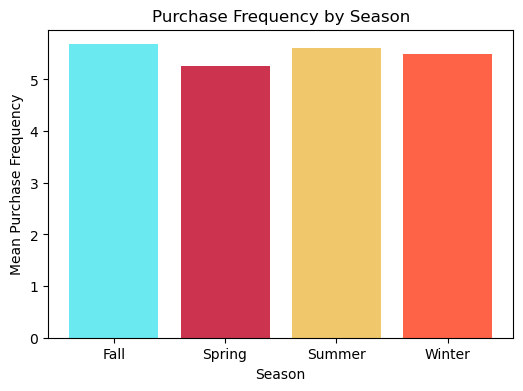

In [25]:
#Filter out the row which contain season = hidden
electronics_data = electronics_data[electronics_data['Season'] != 'Hidden']
seasonal_data = electronics_data.groupby('Season', as_index=False)['Purchase_Frequency_Per_Month'].mean()
plt.figure(figsize=(6, 4))
plt.bar(seasonal_data['Season'], seasonal_data['Purchase_Frequency_Per_Month'], color=['#6be9f0', '#Cb334e', '#F0c86b', 'tomato', '#338ecb'])
plt.title('Purchase Frequency by Season')
plt.xlabel('Season')
plt.ylabel('Mean Purchase Frequency')
plt.show()

#### Module 3: Clustering Analysis:

##### A. K-Means Clustering:

In [26]:
#cluster Atrributes Corelation, we use correlation to find relation b/w two or multiple columns
Cluster_Attributes = electronics_data[['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Product_Category_Preference_Score', 'Income_Level_Score']]
Cluster_Attributes.corr()

Age  Purchase_Amount  \
Age                                1.000000        -0.010981   
Purchase_Amount                   -0.010981         1.000000   
Average_Spending_Per_Purchase     -0.031818        -0.001465   
Purchase_Frequency_Per_Month       0.001978         0.007965   
Brand_Affinity_Score               0.018249         0.027276   
Product_Category_Preference_Score  0.008666        -0.048099   
Income_Level_Score                -0.025444         0.040925   

                                   Average_Spending_Per_Purchase  \
Age                                                    -0.031818   
Purchase_Amount                                        -0.001465   
Average_Spending_Per_Purchase                           1.000000   
Purchase_Frequency_Per_Month                           -0.021150   
Brand_Affinity_Score                                   -0.046469   
Product_Category_Preference_Score                      -0.025756   
Income_Level_Score                                      0.002400   

                                   Purchase_Frequency_Per_Month  \
Age                                                    0.001978   
Purchase_Amount                                        0.007965   
Average_Spending_Per_Purchase                         -0.021150   
Purchase_Frequency_Per_Month                           1.000000   
Brand_Affinity_Score                                   0.038942   
Product_Category_Preference_Score                     -0.001810   
Income_Level_Score                                     0.029866   

                                   Brand_Affinity_Score  \
Age                                            0.018249   
Purchase_Amount                                0.027276   
Average_Spending_Per_Purchase                 -0.046469   
Purchase_Frequency_Per_Month                   0.038942   
Brand_Affinity_Score                           1.000000   
Product_Category_Preference_Score             -0.016646   
Income_Level_Score                            -0.031505   

                                   Product_Category_Preference_Score  \
Age                                                         0.008666   
Purchase_Amount                                            -0.048099   
Average_Spending_Per_Purchase                              -0.025756   
Purchase_Frequency_Per_Month                               -0.001810   
Brand_Affinity_Score                                       -0.016646   
Product_Category_Preference_Score                           1.000000   
Income_Level_Score                                          0.005449   

                                   Income_Level_Score  
Age                                         -0.025444  
Purchase_Amount                              0.040925  
Average_Spending_Per_Purchase                0.002400  
Purchase_Frequency_Per_Month                 0.029866  
Brand_Affinity_Score                        -0.031505  
Product_Category_Preference_Score            0.005449  
Income_Level_Score                           1.000000

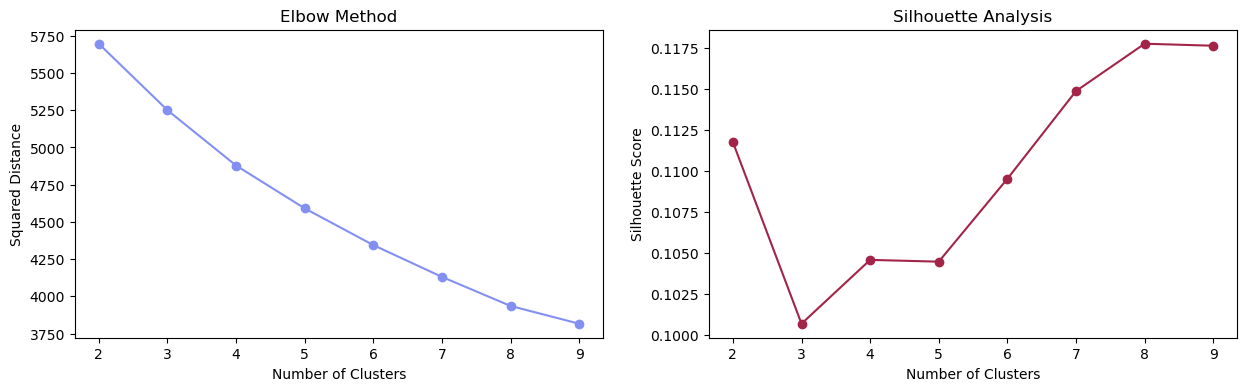

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import os
import warnings

os.environ['OMP_NUM_THREADS'] = '4'

# Suppress KMeans memory leak warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

# Normalization
scaler = StandardScaler()
scaled_values = scaler.fit_transform(Cluster_Attributes)

# Elbow method:
sse = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_values)
    sse.append(kmeans.inertia_)

# Elbow curve
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, sse, marker='o',  color='#8390f2')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Squared Distance')

# Silhouette
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_values)
    silhouette_scores.append(silhouette_score(scaled_values, cluster_labels))

# Silhouette plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='#A22549')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


			 Relation of Different Electronics Data Column using K-MEAN:


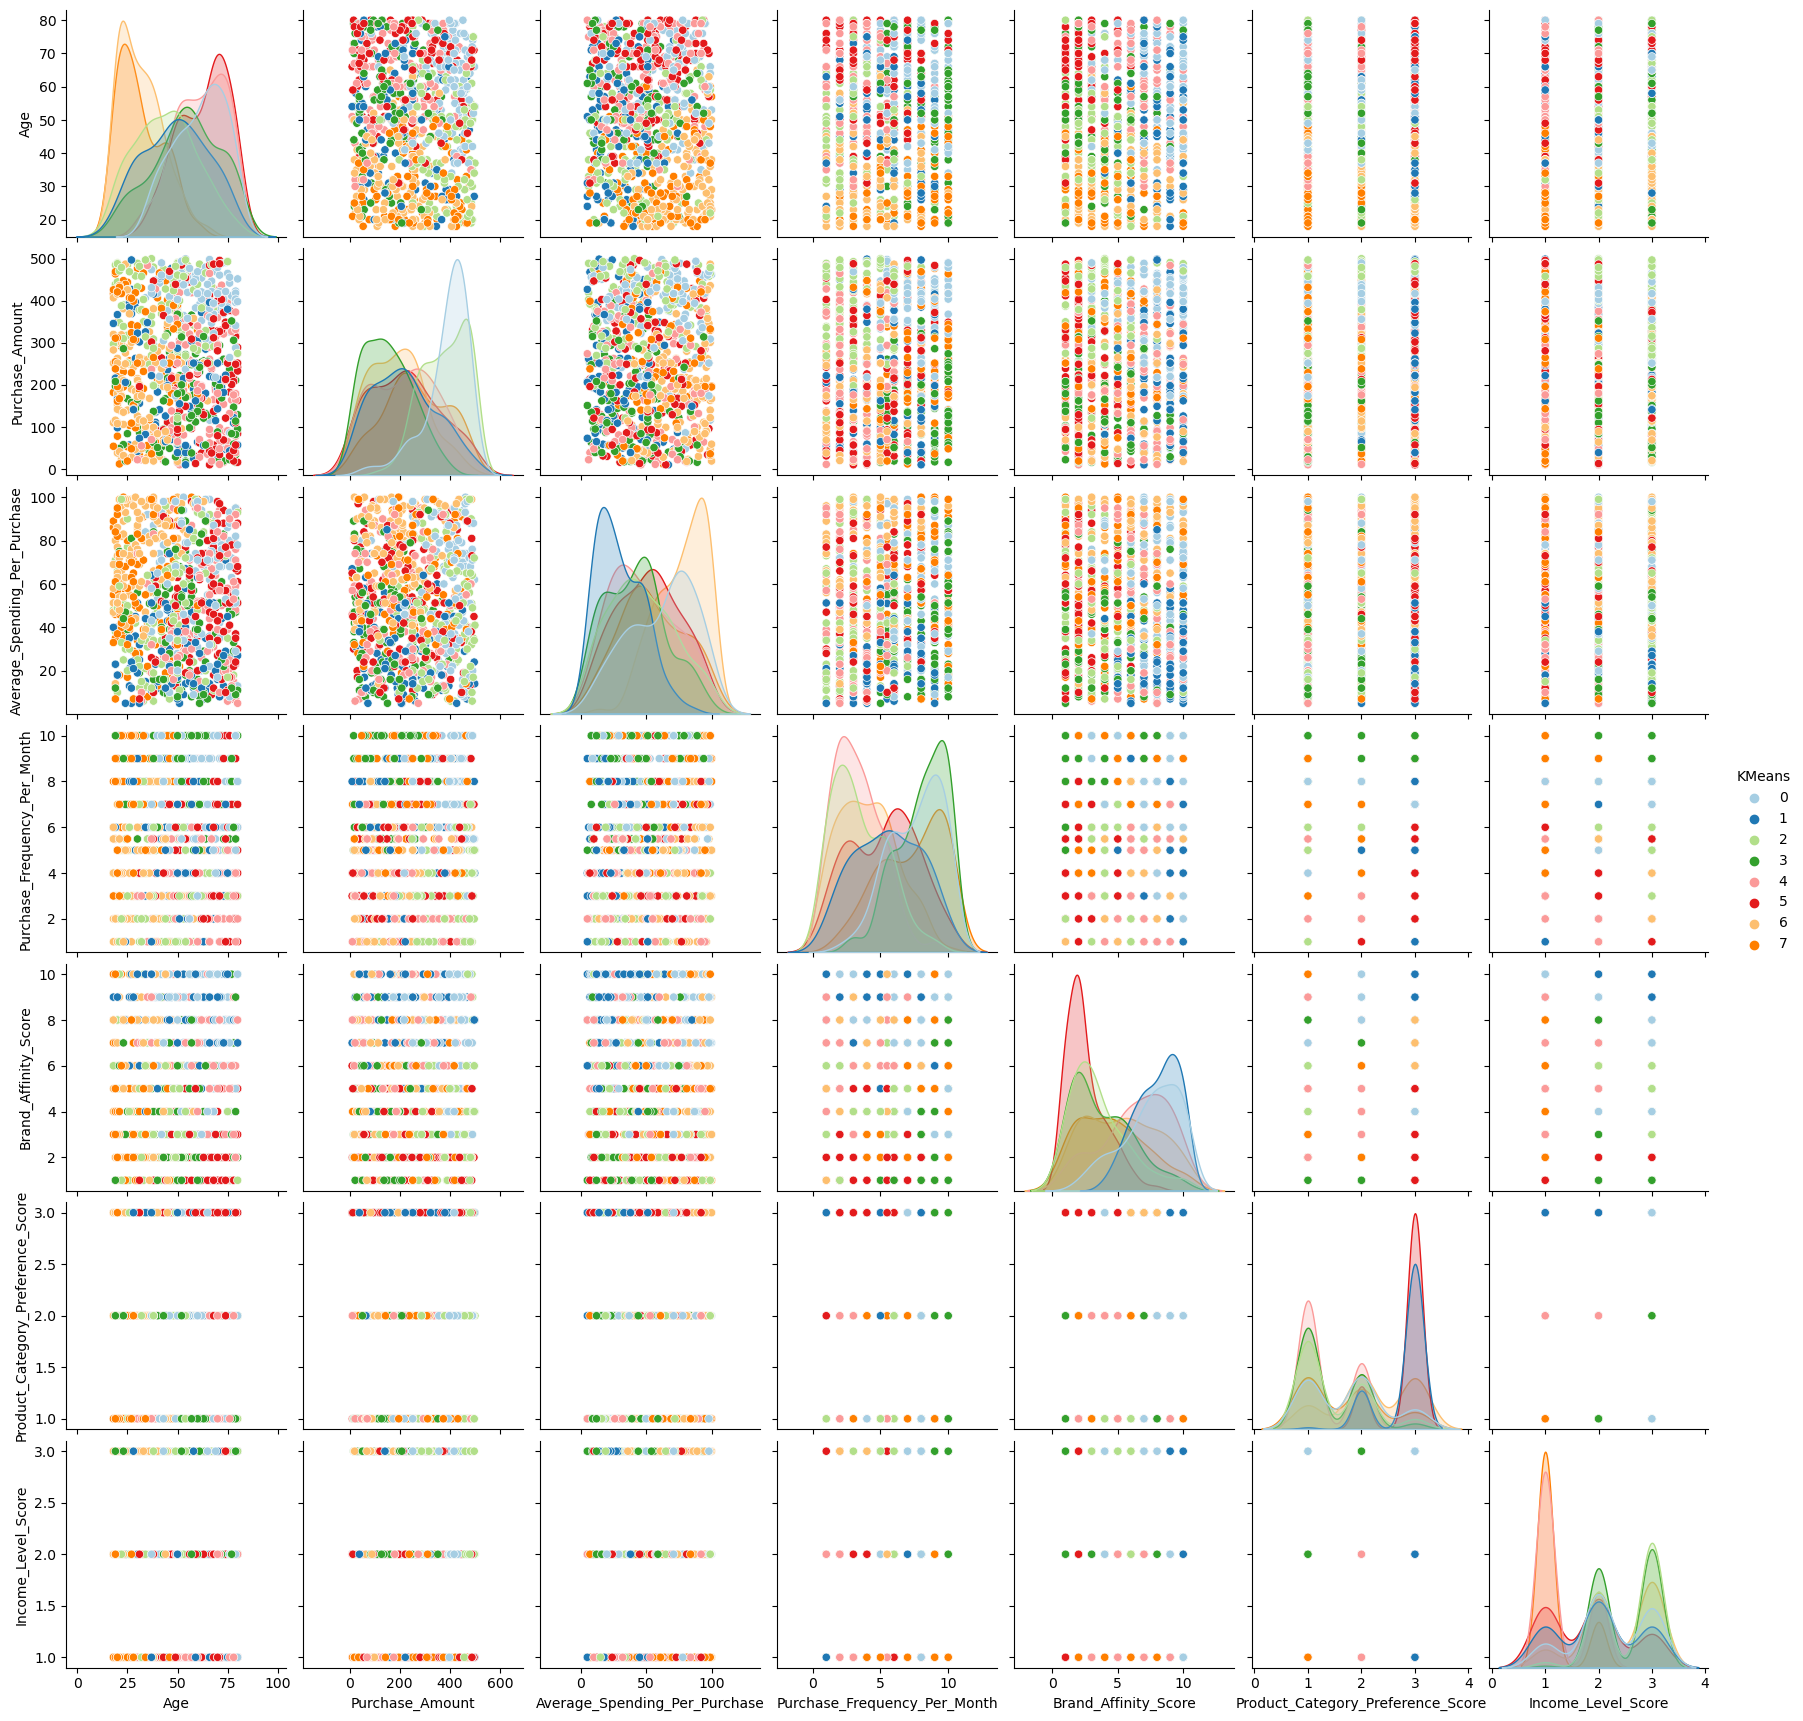

In [28]:
k_value = 8

print("\n\t\t\t Relation of Different Electronics Data Column using K-MEAN:")

electronics_data = electronics_data.copy()
kmeans = KMeans(n_clusters=k_value, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_values)
# Replace the line triggering the warning
electronics_data.loc[:, 'KMeans'] = cluster_labels
features_for_pairplot = ['Age','Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 
                         'Brand_Affinity_Score', 'Product_Category_Preference_Score', 'Income_Level_Score', 'KMeans']
# DataFrame with selected features
data_for_pairplot = electronics_data[features_for_pairplot]
# pairplot 
sns.pairplot(data_for_pairplot, hue='KMeans', palette='Paired')
plt.show()

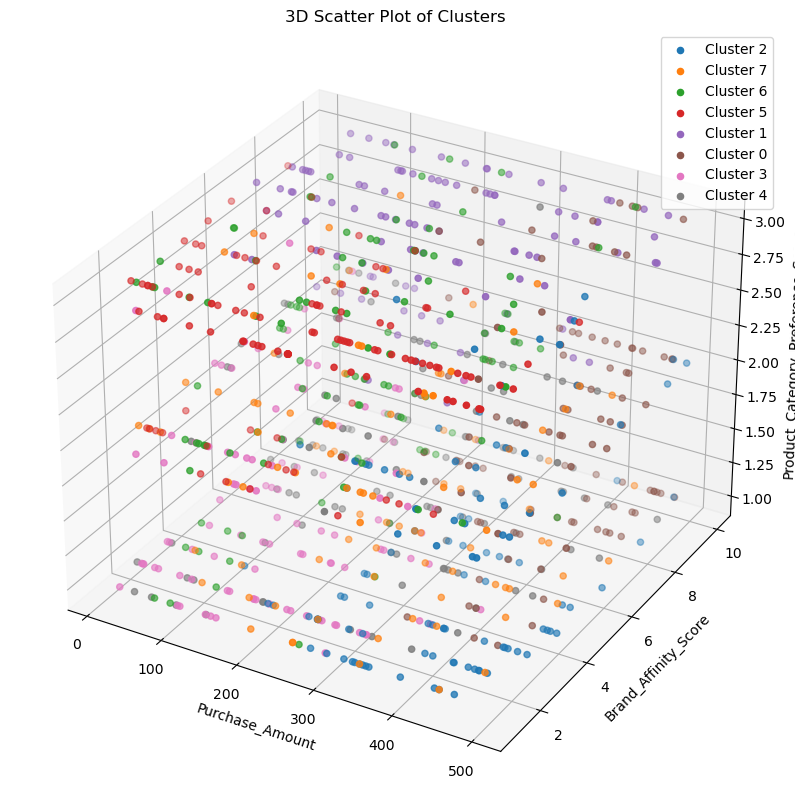

In [29]:
#3D Plot of Cluster
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for cluster_label in electronics_data['KMeans'].unique():  
    cluster_data = electronics_data[electronics_data['KMeans'] == cluster_label]
    ax.scatter(cluster_data['Purchase_Amount'], cluster_data['Brand_Affinity_Score'], cluster_data['Product_Category_Preference_Score'], label=f'Cluster {cluster_label}')
ax.set_xlabel('Purchase_Amount')
ax.set_ylabel('Brand_Affinity_Score')
ax.set_zlabel('Product_Category_Preference_Score')
ax.set_title('3D Scatter Plot of Clusters')
ax.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

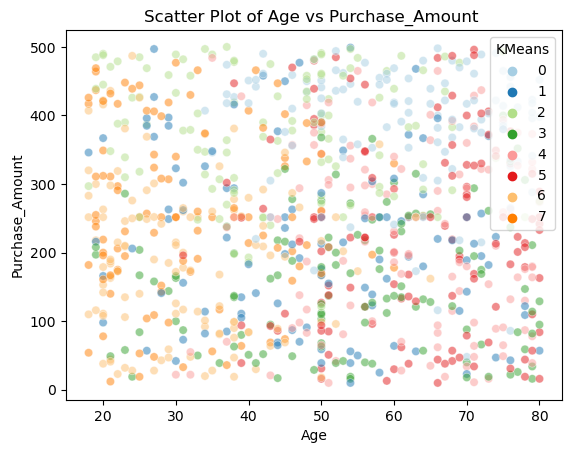

In [30]:
#Relation of Age with Purchase Amount
feature1 = 'Age'
feature2 = 'Purchase_Amount'
sns.scatterplot(x=feature1, y=feature2, hue='KMeans', data=data_for_pairplot, palette='Paired', alpha=0.5)
plt.title(f'Scatter Plot of {feature1} vs {feature2} ')
plt.show

In [31]:
# KMeans clusters Analysis
print("\n\t\t\t Means Values of Different Coulumns of Electronics Data Using Kmean: ")
features_to_analyze = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Product_Category_Preference_Score', 'Income_Level_Score']
Means_cluster = electronics_data.groupby('KMeans')[features_to_analyze].mean()
Means_cluster


			 Means Values of Different Coulumns of Electronics Data Using Kmean: 


Age  Purchase_Amount  Average_Spending_Per_Purchase  \
KMeans                                                              
0       60.891892       386.992602                      61.743149   
1       49.008929       217.929320                      30.120256   
2       44.175439       378.952907                      46.624771   
3       54.173913       152.849794                      41.888722   
4       61.426230       219.119929                      47.122780   
5       62.727273       222.147191                      51.582386   
6       31.747899       189.885358                      76.781337   
7       31.504854       259.826057                      54.643153   

        Purchase_Frequency_Per_Month  Brand_Affinity_Score  \
KMeans                                                       
0                           7.576035              7.513514   
1                           5.513124              7.991071   
2                           3.460087              3.587719   
3                           8.047216              3.808696   
4                           3.319015              6.377049   
5                           5.226527              2.537190   
6                           4.041511              5.344538   
7                           7.276213              4.553398   

        Product_Category_Preference_Score  Income_Level_Score  
KMeans                                                         
0                                1.756757            2.225225  
1                                2.794643            2.000000  
2                                1.456140            2.578947  
3                                1.408696            2.530435  
4                                1.352459            1.278689  
5                                2.834711            1.834711  
6                                2.210084            2.378151  
7                                1.679612            1.174757

###### Conclusion:
1. Cluster 6 stands out with the highest purchase amount, relatively high average spending per purchase, and high purchase frequency per month. The brand affinity score and product category preference score are also high. indicating a high-value customer segment.
3. Cluster 3 has a lower average spending per purchase and lower purchase frequency, representing a segment with lower engagement.


##### B. DBSCAN Clustering:

Values of Eps & Minpts According to Electronics_data: 
 Eps=1.5, 
 MinPts=15

			 Relation of Different Electronics Data Column using DB-SCAN:


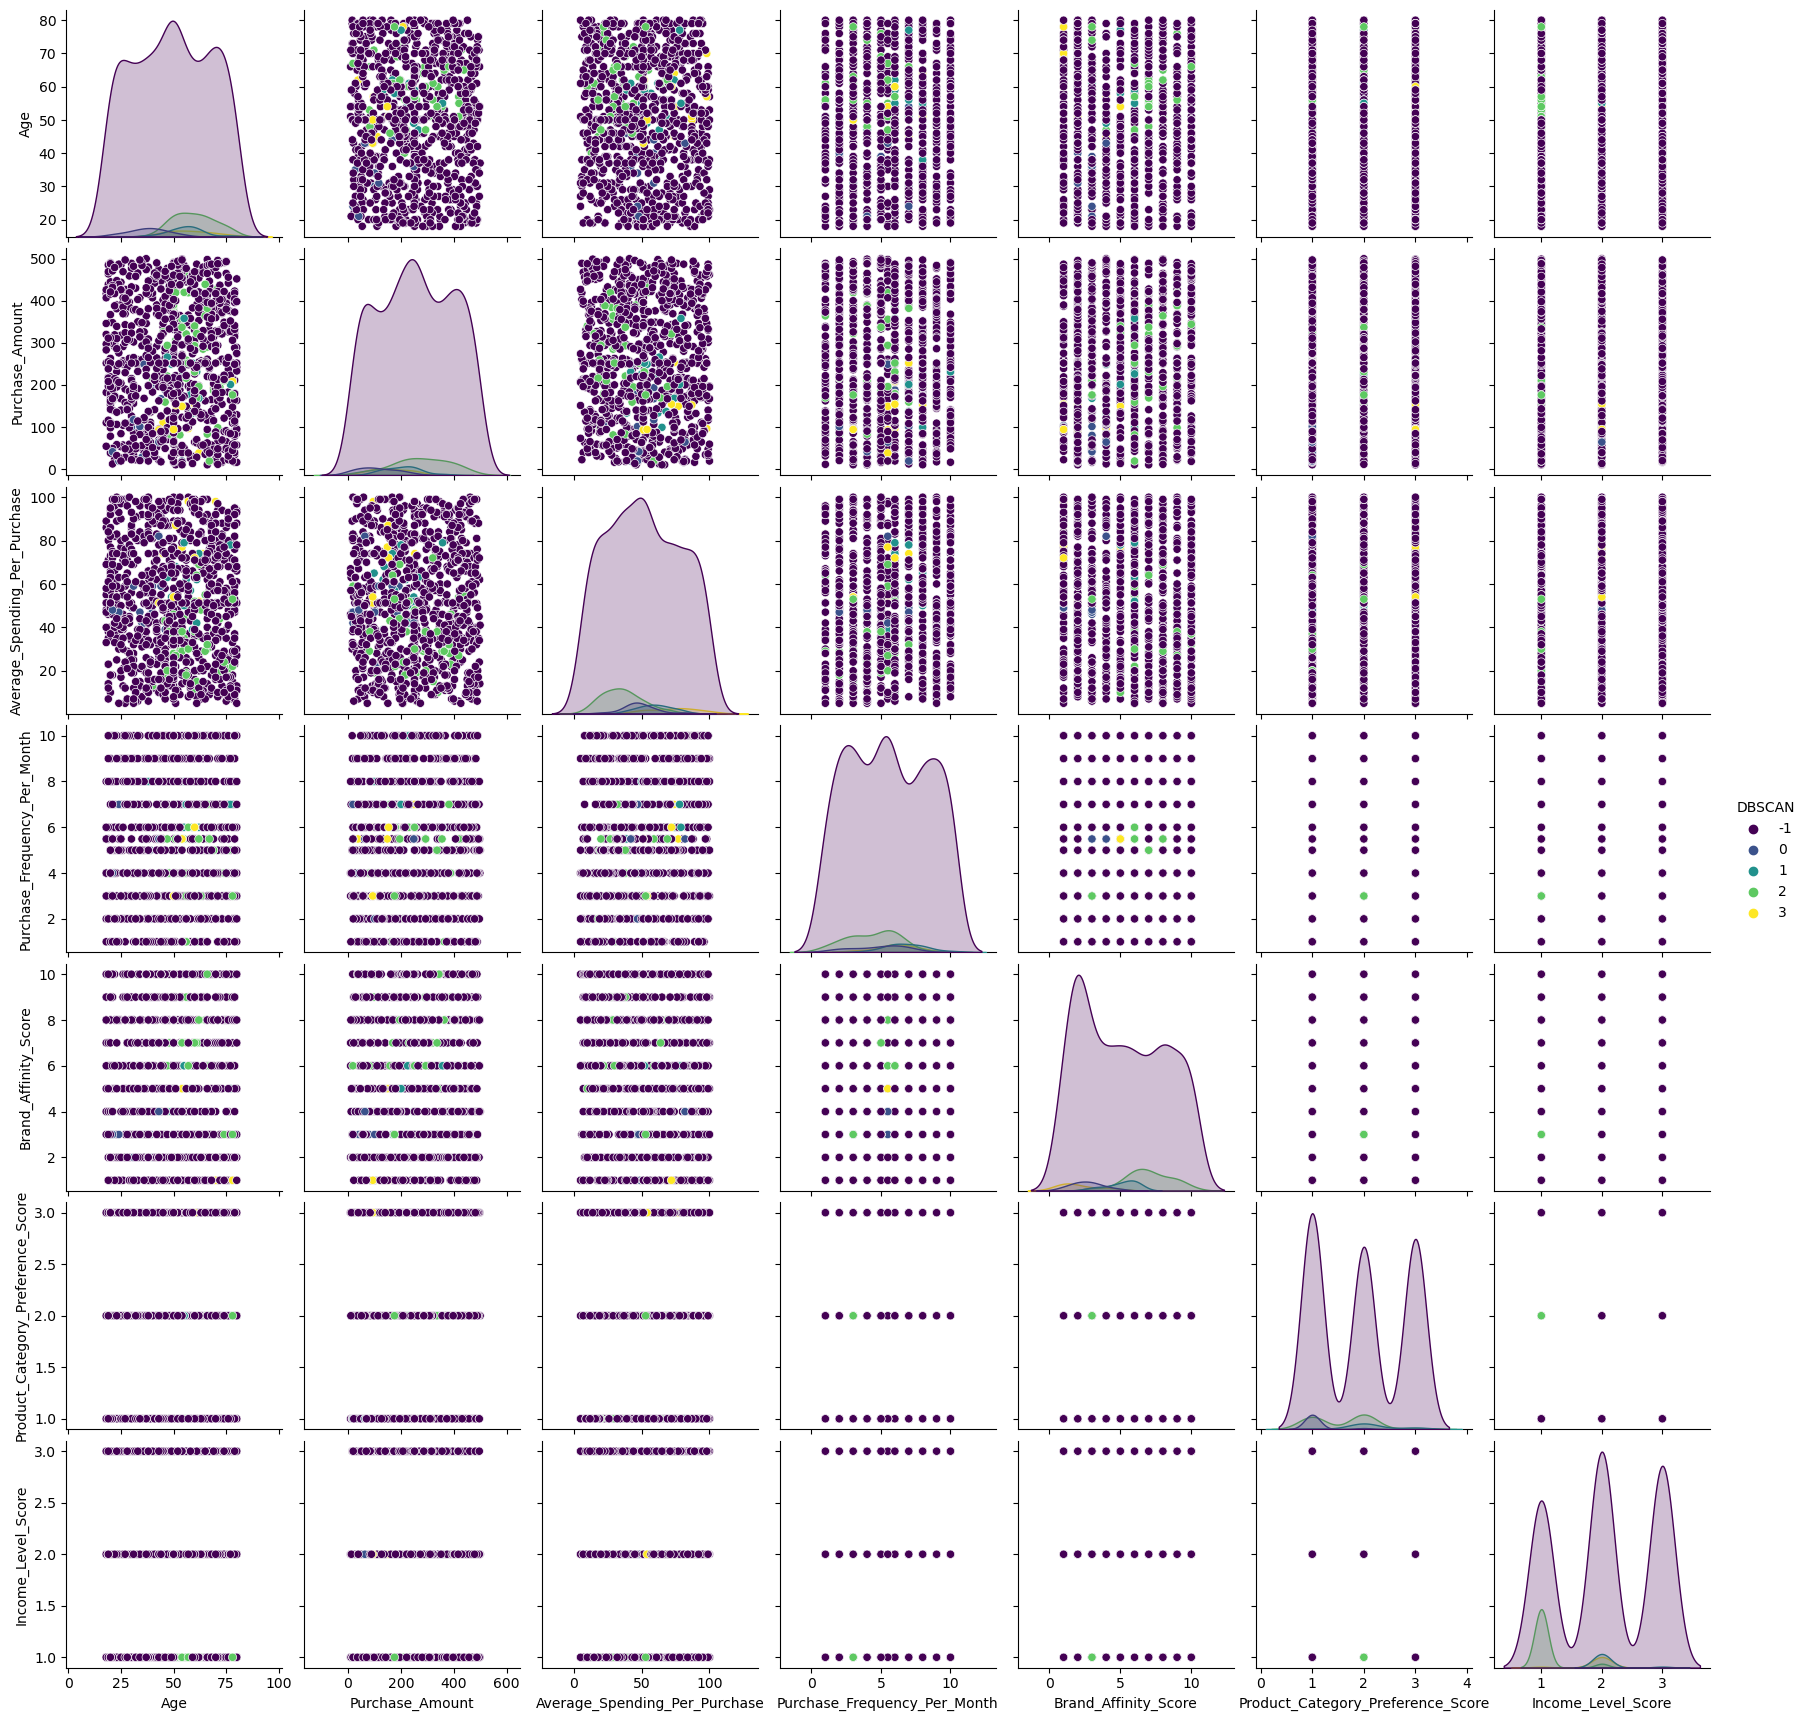

In [32]:
from sklearn.cluster import DBSCAN

# values of eps and MinPts
#eps define the radius & minpts define the minimum number of data points
eps_values = [0.5, 1.0, 1.5]
samples_value1 = [15, 20, 25]
best_eps = None
samples_value2 = None
silhouette_sc1 = -1
for eps in eps_values:
    for min_samples in samples_value1:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(scaled_values)
        # Exclude noise points -1
        if len(set(cluster_labels)) > 1:  
            silhouette_avg = silhouette_score(scaled_values, cluster_labels)
            if silhouette_avg > silhouette_sc1:
                silhouette_sc1 = silhouette_avg
                best_eps = eps
                samples_value2 = min_samples
print("Values of Eps & Minpts According to Electronics_data: ")
print(f" Eps={best_eps}, \n MinPts={samples_value2}")


#Relation of Different Electronics Data Column using K-MEAN
print("\n\t\t\t Relation of Different Electronics Data Column using DB-SCAN:")
dbscan = DBSCAN(eps=best_eps, min_samples=samples_value2)
cluster_labels = dbscan.fit_predict(scaled_values)
electronics_data['DBSCAN'] = cluster_labels
features_for_pairplot_dbscan = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
                                'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
                                'Product_Category_Preference_Score', 'Income_Level_Score', 'DBSCAN']
data_for_pairplot_dbscan = electronics_data[features_for_pairplot_dbscan]
# pairplot
sns.pairplot(data_for_pairplot_dbscan, hue='DBSCAN', palette='viridis')
plt.show()

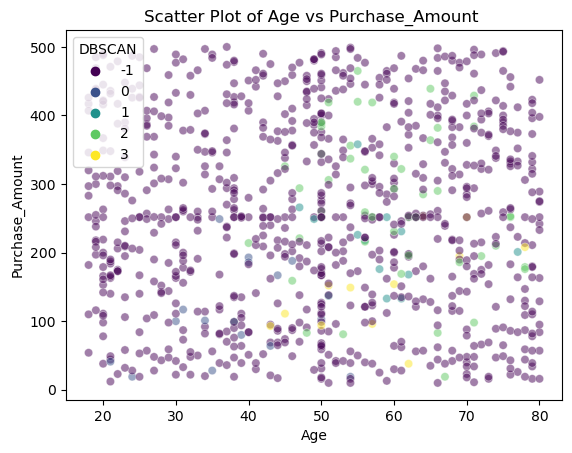

In [33]:
#Scatter Plot of clusters using DB-SCAN
feature1 = 'Age'
feature2 = 'Purchase_Amount'
sns.scatterplot(x=feature1, y=feature2, hue='DBSCAN', data=data_for_pairplot_dbscan, palette='viridis', alpha=0.5)
plt.title(f'Scatter Plot of {feature1} vs {feature2} ')
plt.show()

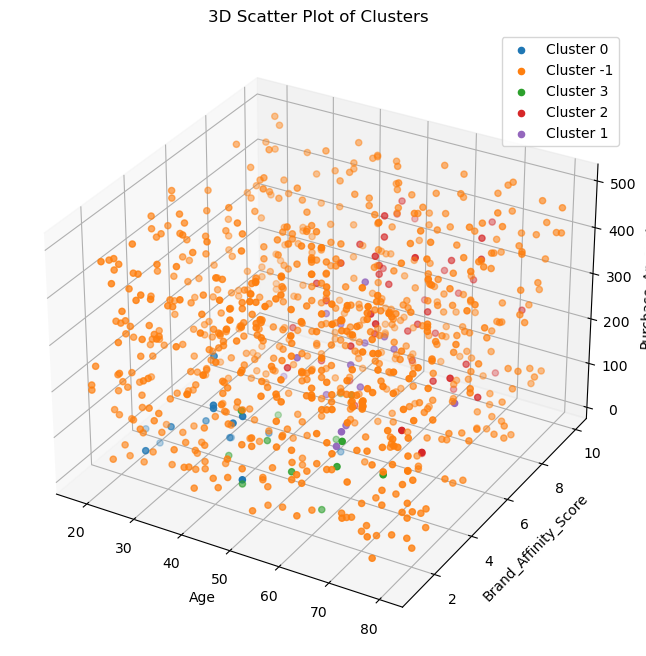

In [34]:
import seaborn as sns

# 3D Scatter Plot of Clusters Using DB-SCAN
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster_label in electronics_data['DBSCAN'].unique():  
    cluster_data = electronics_data[electronics_data['DBSCAN'] == cluster_label]
    ax.scatter(
        cluster_data['Age'],
        cluster_data['Brand_Affinity_Score'],
        cluster_data['Purchase_Amount'],
        label=f'Cluster {cluster_label}'
    )
ax.set_xlabel('Age')
ax.set_ylabel('Brand_Affinity_Score')
ax.set_zlabel('Purchase_Amount')
ax.set_title('3D Scatter Plot of Clusters')
ax.legend()
plt.show()

In [35]:

# Analyze DBScan clusters
print("\n\t\t\t Means Values of Different Coulumns of Electronics Data Using DB-SCAN: ")
features_to_analyze = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Product_Category_Preference_Score', 'Income_Level_Score']
dbscan_cluster = electronics_data.groupby('DBSCAN')[features_to_analyze].mean()
dbscan_cluster


			 Means Values of Different Coulumns of Electronics Data Using DB-SCAN: 


Age  Purchase_Amount  Average_Spending_Per_Purchase  \
DBSCAN                                                              
-1      49.153753       255.594607                      51.839077   
 0      37.800000       110.333333                      48.666667   
 1      55.866667       206.563503                      59.749652   
 2      59.625000       274.842761                      35.755100   
 3      57.923077       157.419426                      73.345352   

        Purchase_Frequency_Per_Month  Brand_Affinity_Score  \
DBSCAN                                                       
-1                          5.546185              5.193705   
 0                          4.798664              2.666667   
 1                          6.798664              5.066667   
 2                          4.425622              6.916667   
 3                          6.036149              2.153846   

        Product_Category_Preference_Score  Income_Level_Score  
DBSCAN                                                         
-1                               1.956416            2.059322  
 0                               1.066667            2.000000  
 1                               2.133333            2.066667  
 2                               1.604167            1.062500  
 3                               3.000000            1.923077

###### Conclusion:

1. Cluster -1: This cluster represents a segment characterized by a relatively high purchase amount, substantial average spending per purchase, and a moderate purchase frequency per month. Customers in this cluster exhibit a high brand affinity score, indicating a strong connection to specific brands. Additionally, they show a well-distributed preference for various product categories. The income level score for this cluster is moderate.
2. Cluster 0: This cluster signifies a segment with a moderate purchase amount, average spending per purchase, and purchase frequency per month. Customers in this cluster have a moderate brand affinity score, suggesting a reasonable level of loyalty to certain brands. Their product category preference is balanced across different categories. The income level score for this cluster is also moderate.

##### C. K-Means++ Clustering:


			 Relation of Different Electronics Data Column using Kmean++:


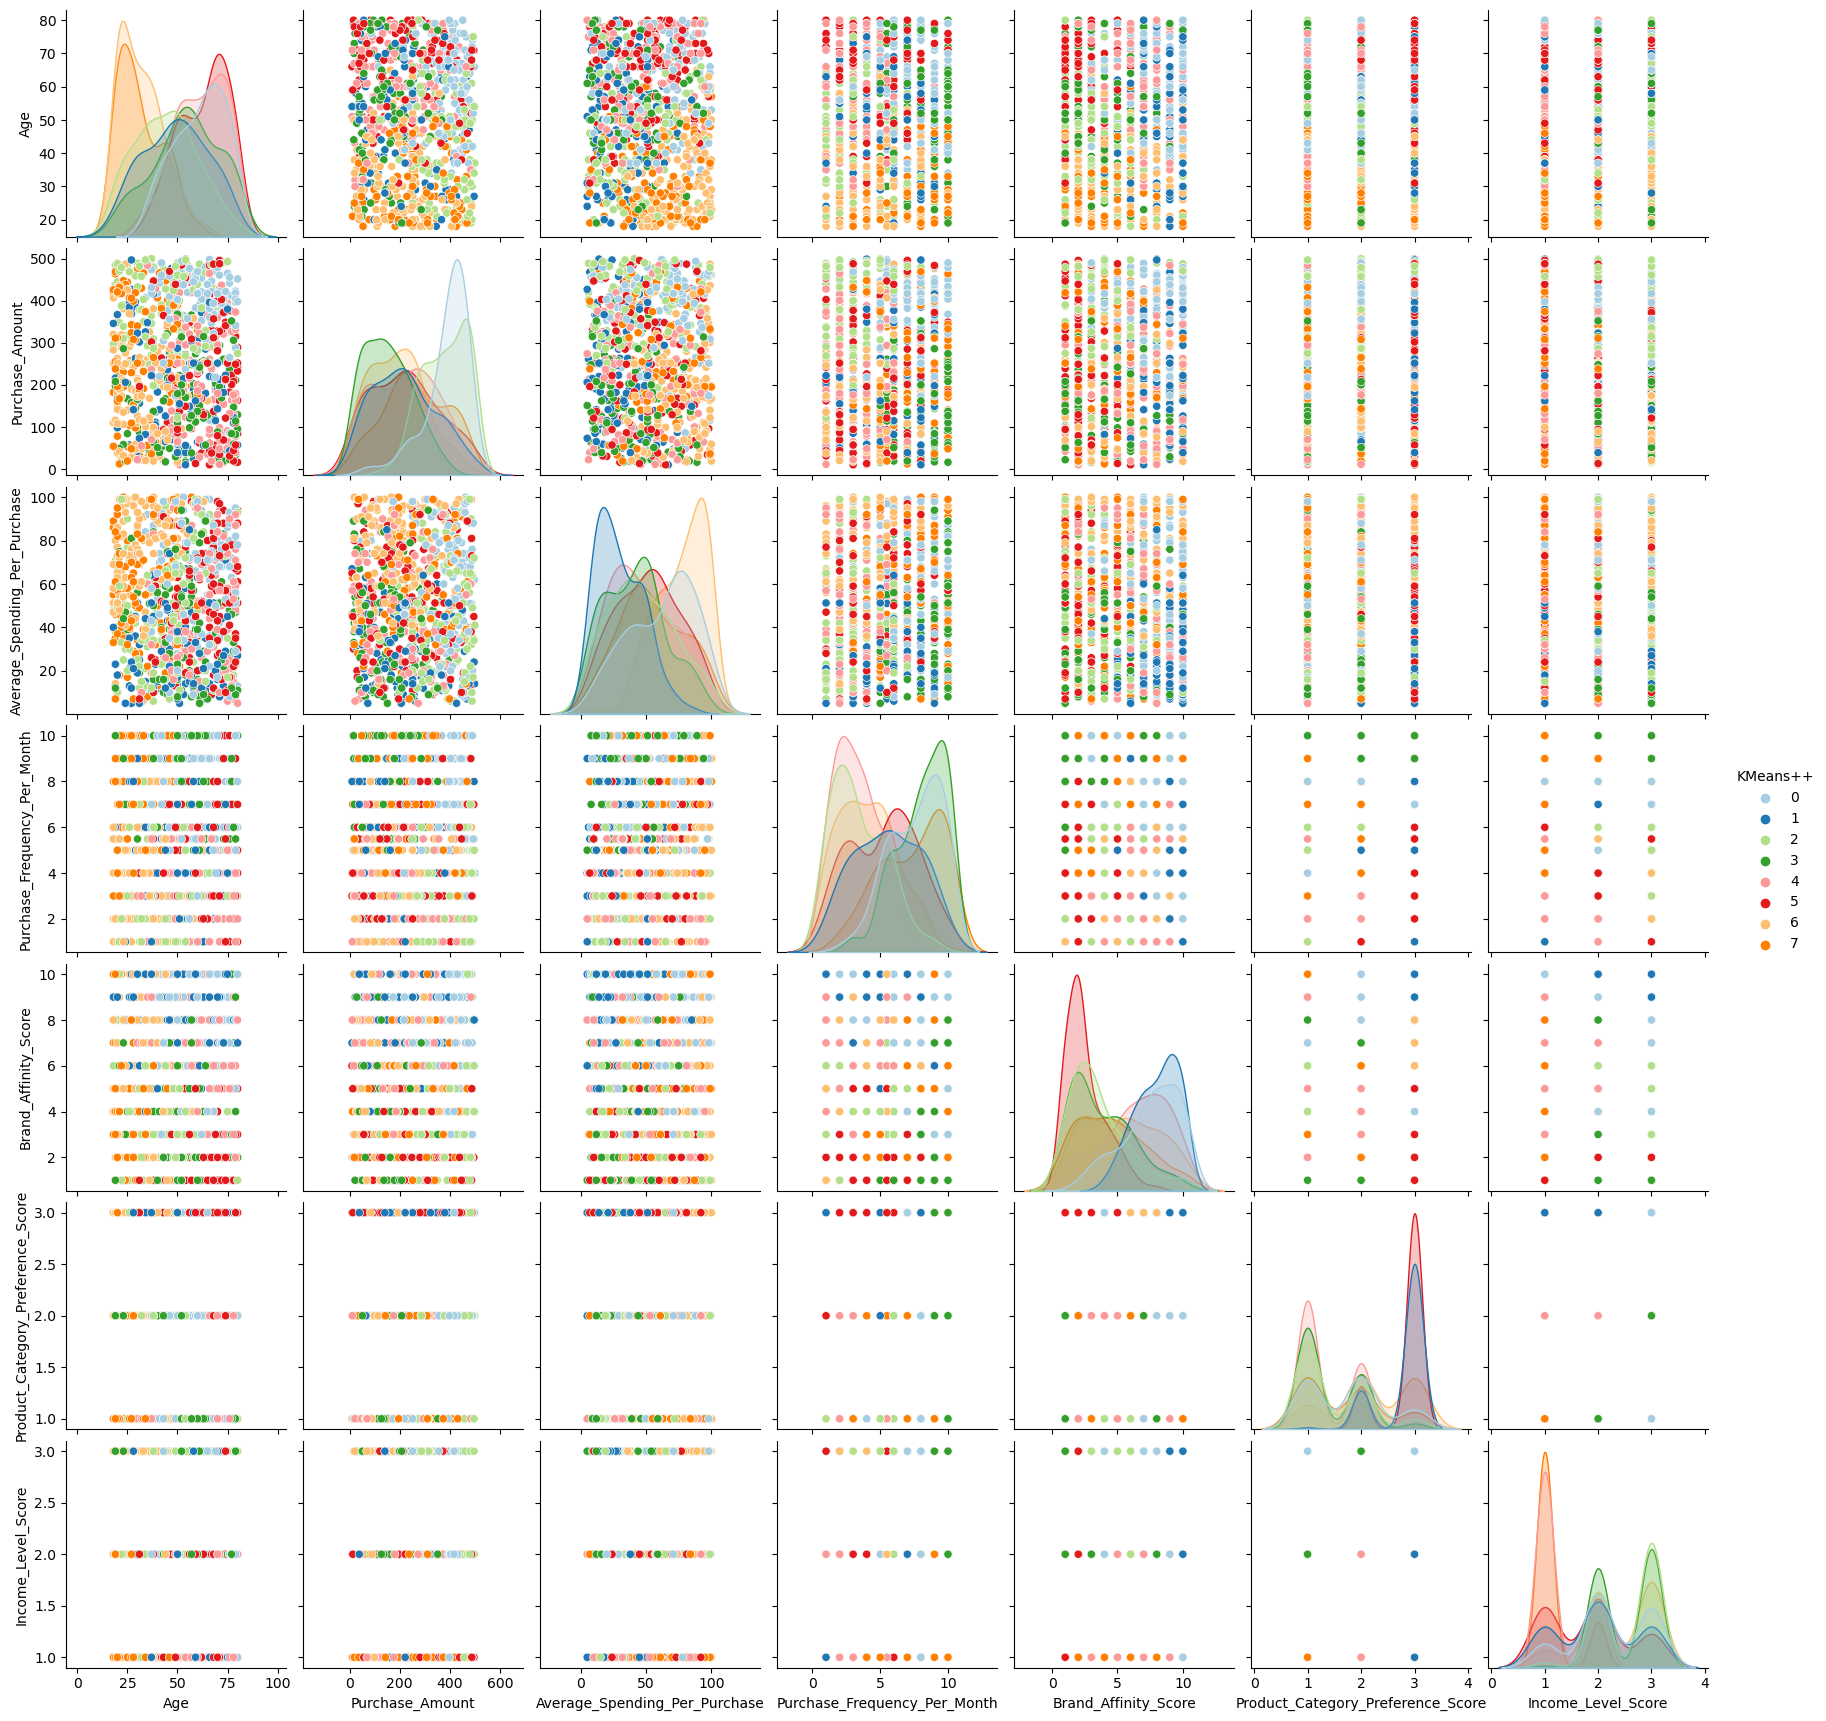

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
print("\n\t\t\t Relation of Different Electronics Data Column using Kmean++:")
kmeans_plusplus = KMeans(n_clusters=k_value, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans_plusplus.fit_predict(scaled_values)
# cluster label
electronics_data['KMeans++'] = cluster_labels
features_for_pairplot = ['Age','Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 
                         'Brand_Affinity_Score', 'Product_Category_Preference_Score', 'Income_Level_Score', 'KMeans++']
# Creating a DataFrame with selected features and cluster labels
data_for_pairplotkk = electronics_data[features_for_pairplot]
sns.pairplot(data_for_pairplotkk, hue='KMeans++', palette='Paired')
plt.show()

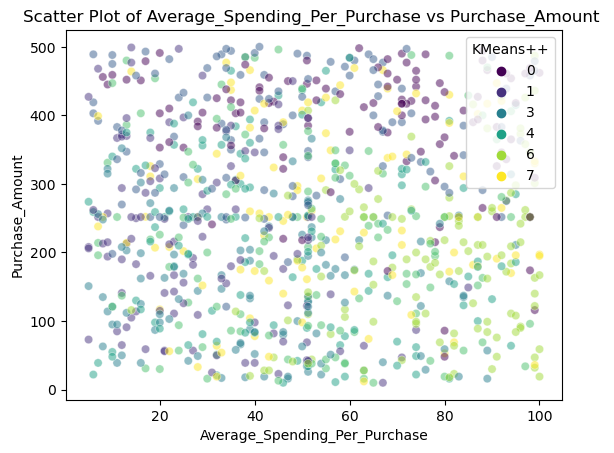

In [37]:
#Scatter Plot of clusters using kmeans++
feature1k = 'Average_Spending_Per_Purchase'
feature2k = 'Purchase_Amount'
sns.scatterplot(x=feature1k, y=feature2k, hue='KMeans++', data=data_for_pairplotkk, palette='viridis', alpha=0.5)
plt.title(f'Scatter Plot of {feature1k} vs {feature2k} ')
plt.show()

In [38]:
# KMeans ++ Analsis
print("\n\t\t\t Means Values of Different Coulumns of Electronics Data Using Kmean++: ")
features_to_analyze = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Product_Category_Preference_Score', 'Income_Level_Score']
kmeanspp_cluster = electronics_data.groupby('KMeans++')[features_to_analyze].mean()
kmeanspp_cluster


			 Means Values of Different Coulumns of Electronics Data Using Kmean++: 


Age  Purchase_Amount  Average_Spending_Per_Purchase  \
KMeans++                                                              
0         60.891892       386.992602                      61.743149   
1         49.008929       217.929320                      30.120256   
2         44.175439       378.952907                      46.624771   
3         54.173913       152.849794                      41.888722   
4         61.426230       219.119929                      47.122780   
5         62.727273       222.147191                      51.582386   
6         31.747899       189.885358                      76.781337   
7         31.504854       259.826057                      54.643153   

          Purchase_Frequency_Per_Month  Brand_Affinity_Score  \
KMeans++                                                       
0                             7.576035              7.513514   
1                             5.513124              7.991071   
2                             3.460087              3.587719   
3                             8.047216              3.808696   
4                             3.319015              6.377049   
5                             5.226527              2.537190   
6                             4.041511              5.344538   
7                             7.276213              4.553398   

          Product_Category_Preference_Score  Income_Level_Score  
KMeans++                                                         
0                                  1.756757            2.225225  
1                                  2.794643            2.000000  
2                                  1.456140            2.578947  
3                                  1.408696            2.530435  
4                                  1.352459            1.278689  
5                                  2.834711            1.834711  
6                                  2.210084            2.378151  
7                                  1.679612            1.174757

###### Conclusion:

1. Cluster 0 stands out with the highest purchase amount and relatively high average spending per purchase, indicating a high-value customer segment.
2. Cluster 1 has Moderate purchase amount the moderate average purchase amount bModerate purchase frequency per month, Moderate brand affinity score suggesting potential moderate-value but moderate frequent buyers.
3. Cluster 2 has a lower average spending per purchase and lower purchase frequency,  representing a segment with lower engagement.
4. Cluster  has the highest brand affinity score, indicating a strong preference for brands.
 it Does not show any difference bwteen KMeans and KMeans++


#### Module 4: Comparison and Conclusion:

In [39]:
# Specify the features to analyze
features_to_analyze = ['Age', 'Purchase_Amount', 'Average_Spending_Per_Purchase', 'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score', 'Product_Category_Preference_Score', 'Income_Level_Score']

# Analyze KMeans clusters
kmeans_cluster_analysis = electronics_data.groupby('KMeans')[features_to_analyze].mean()

# Analyze KMeans++ clusters
kmeans_plus_cluster_analysis = electronics_data.groupby('KMeans++')[features_to_analyze].mean()

# Analyze DBSCAN clusters
dbscan_cluster_analysis = electronics_data.groupby('DBSCAN')[features_to_analyze].mean()

# Print the cluster analyses
print("KMeans Cluster Analysis:")
kmeans_cluster_analysis

KMeans Cluster Analysis:


Age  Purchase_Amount  Average_Spending_Per_Purchase  \
KMeans                                                              
0       60.891892       386.992602                      61.743149   
1       49.008929       217.929320                      30.120256   
2       44.175439       378.952907                      46.624771   
3       54.173913       152.849794                      41.888722   
4       61.426230       219.119929                      47.122780   
5       62.727273       222.147191                      51.582386   
6       31.747899       189.885358                      76.781337   
7       31.504854       259.826057                      54.643153   

        Purchase_Frequency_Per_Month  Brand_Affinity_Score  \
KMeans                                                       
0                           7.576035              7.513514   
1                           5.513124              7.991071   
2                           3.460087              3.587719   
3                           8.047216              3.808696   
4                           3.319015              6.377049   
5                           5.226527              2.537190   
6                           4.041511              5.344538   
7                           7.276213              4.553398   

        Product_Category_Preference_Score  Income_Level_Score  
KMeans                                                         
0                                1.756757            2.225225  
1                                2.794643            2.000000  
2                                1.456140            2.578947  
3                                1.408696            2.530435  
4                                1.352459            1.278689  
5                                2.834711            1.834711  
6                                2.210084            2.378151  
7                                1.679612            1.174757

In [40]:
print("\nKMeans++ Cluster Analysis:")
kmeans_plus_cluster_analysis


KMeans++ Cluster Analysis:


Age  Purchase_Amount  Average_Spending_Per_Purchase  \
KMeans++                                                              
0         60.891892       386.992602                      61.743149   
1         49.008929       217.929320                      30.120256   
2         44.175439       378.952907                      46.624771   
3         54.173913       152.849794                      41.888722   
4         61.426230       219.119929                      47.122780   
5         62.727273       222.147191                      51.582386   
6         31.747899       189.885358                      76.781337   
7         31.504854       259.826057                      54.643153   

          Purchase_Frequency_Per_Month  Brand_Affinity_Score  \
KMeans++                                                       
0                             7.576035              7.513514   
1                             5.513124              7.991071   
2                             3.460087              3.587719   
3                             8.047216              3.808696   
4                             3.319015              6.377049   
5                             5.226527              2.537190   
6                             4.041511              5.344538   
7                             7.276213              4.553398   

          Product_Category_Preference_Score  Income_Level_Score  
KMeans++                                                         
0                                  1.756757            2.225225  
1                                  2.794643            2.000000  
2                                  1.456140            2.578947  
3                                  1.408696            2.530435  
4                                  1.352459            1.278689  
5                                  2.834711            1.834711  
6                                  2.210084            2.378151  
7                                  1.679612            1.174757

In [41]:
print("\nDBSCAN Cluster Analysis:")
dbscan_cluster_analysis


DBSCAN Cluster Analysis:


Age  Purchase_Amount  Average_Spending_Per_Purchase  \
DBSCAN                                                              
-1      49.153753       255.594607                      51.839077   
 0      37.800000       110.333333                      48.666667   
 1      55.866667       206.563503                      59.749652   
 2      59.625000       274.842761                      35.755100   
 3      57.923077       157.419426                      73.345352   

        Purchase_Frequency_Per_Month  Brand_Affinity_Score  \
DBSCAN                                                       
-1                          5.546185              5.193705   
 0                          4.798664              2.666667   
 1                          6.798664              5.066667   
 2                          4.425622              6.916667   
 3                          6.036149              2.153846   

        Product_Category_Preference_Score  Income_Level_Score  
DBSCAN                                                         
-1                               1.956416            2.059322  
 0                               1.066667            2.000000  
 1                               2.133333            2.066667  
 2                               1.604167            1.062500  
 3                               3.000000            1.923077